# Project Name: House Prices: Advanced Regression Techniques(Exploratory data analysis)

The main aim of this project is to predict the house price based on various features provided in the Kaggle data sheet

Dataset to downloaded from the below link
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

Following activities is performed in this sheet
1) Data analysis

2) Feature Engineering 

3) Feature Selection

4) Model Selection

5) Model Evaluation

# Importing the Libraries

In [200]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
sns.set()

# Reading the data

In [91]:
house_data = pd.read_csv('C:/Users/hp/Downloads/house-prices-advanced-regression-techniques/train.csv')

In [92]:
house_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

# Exploratory Data Analysis

#### Identification of missing value

<AxesSubplot:>

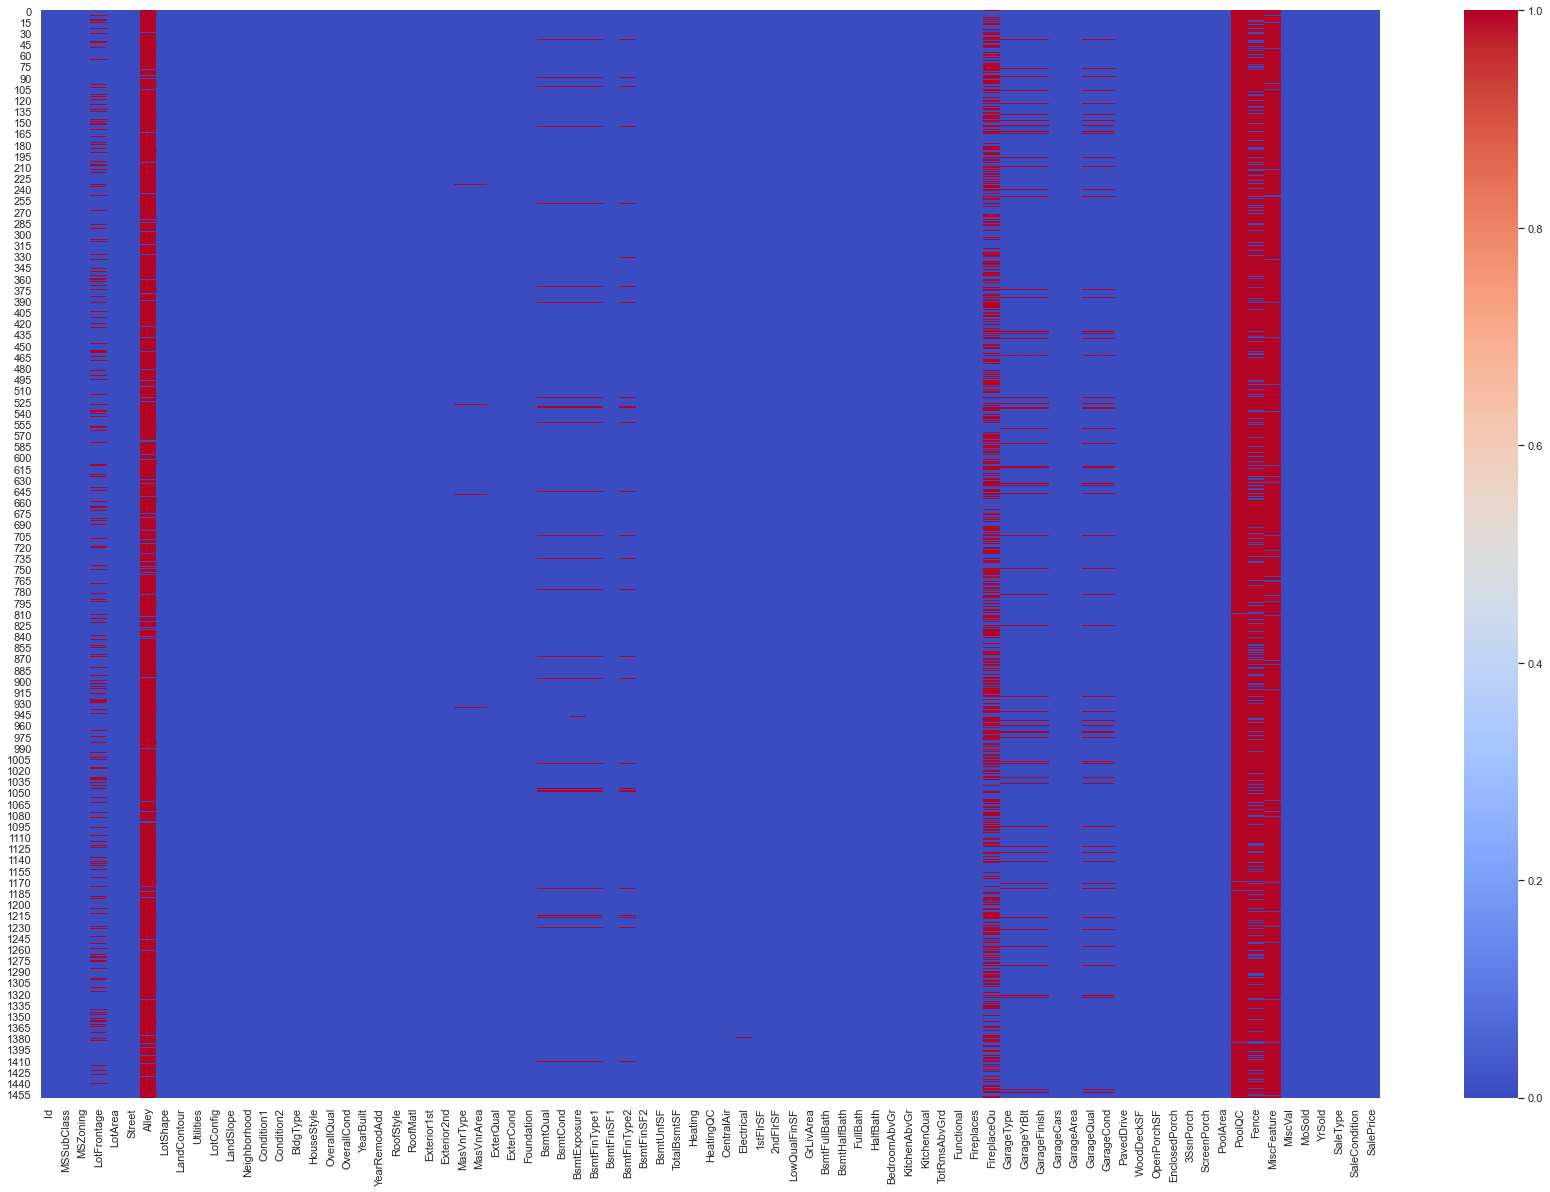

In [93]:
sns.set(rc = {'figure.figsize':(30,20)})
sns.heatmap(house_data.isnull(),cmap='coolwarm')


#### selecting the columns having Missing values

In [94]:
 missing_Values=house_data.columns[house_data.isna().any()].tolist()

In [95]:
missing_Values

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

### To check percentage of missing values

In [96]:
# created a function to plot the numer of missing values in a perticular field

def missing_value_analysis (lst,df):
    for i in lst:
        plt.figure()
        sns.countplot(x=i,data=df.isnull())
        

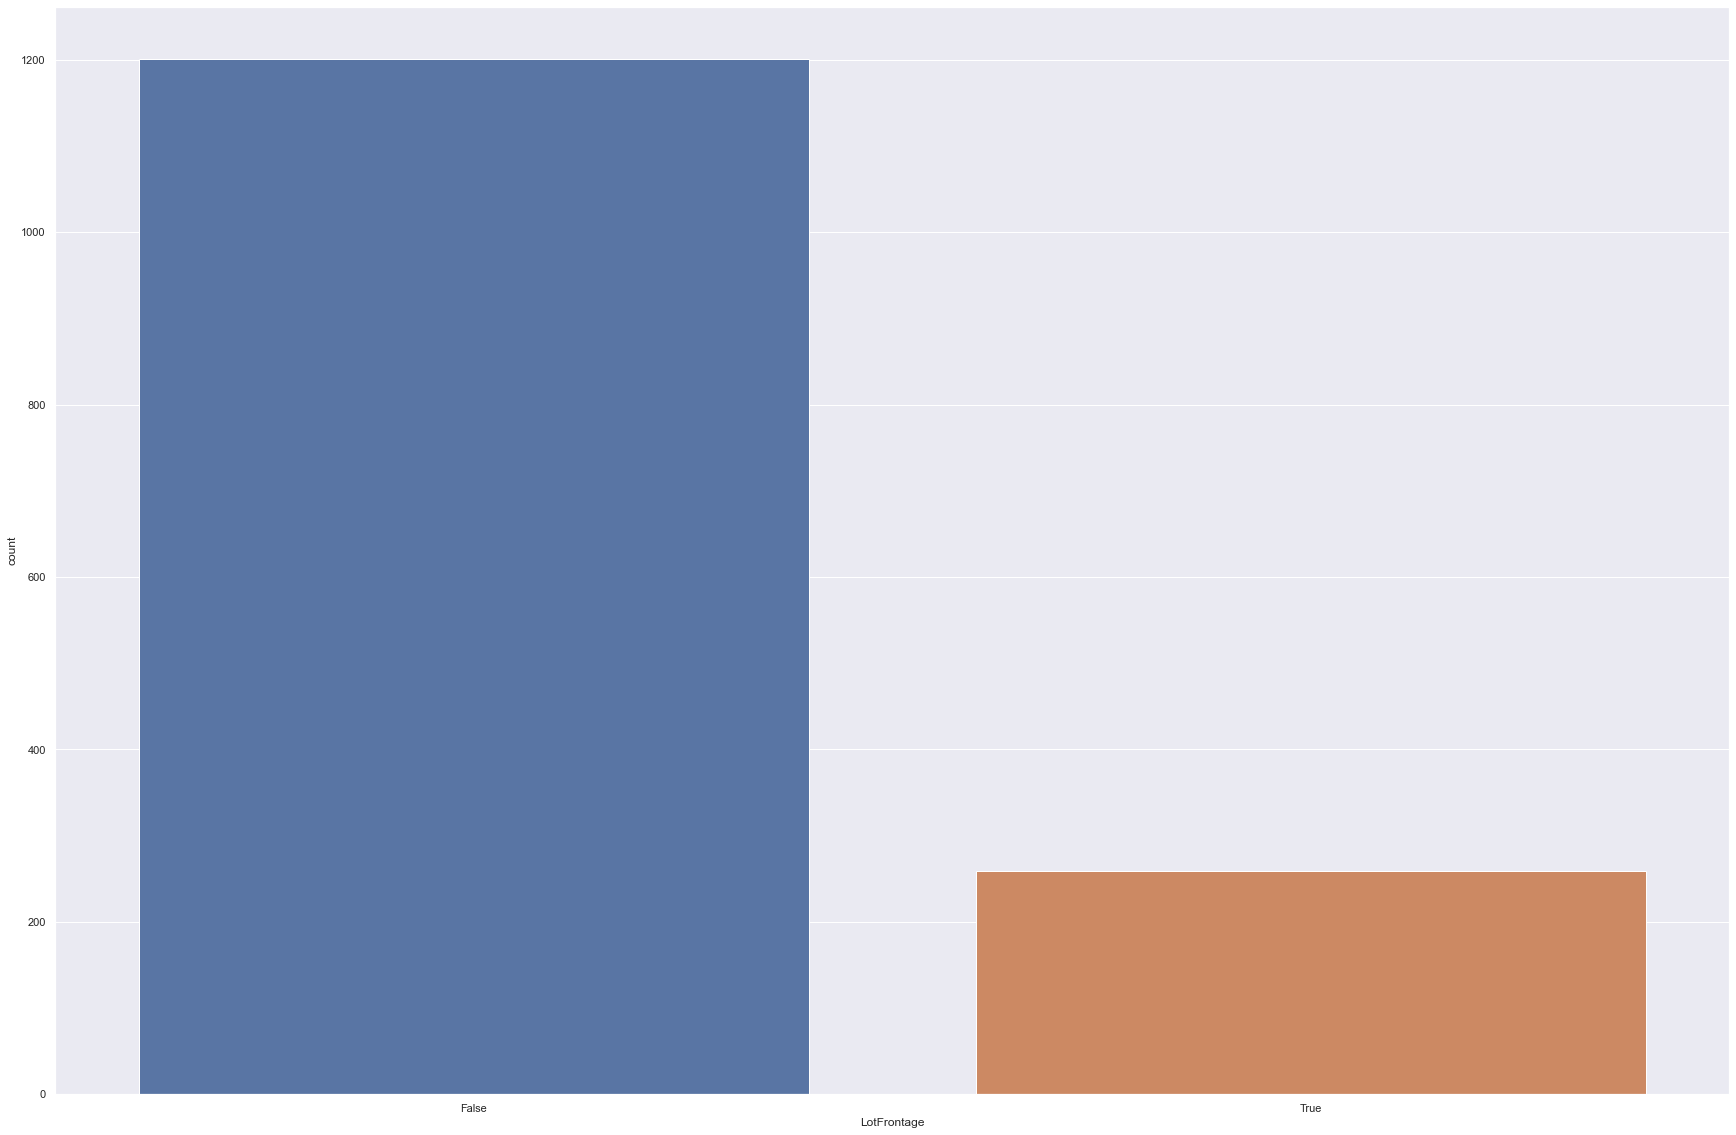

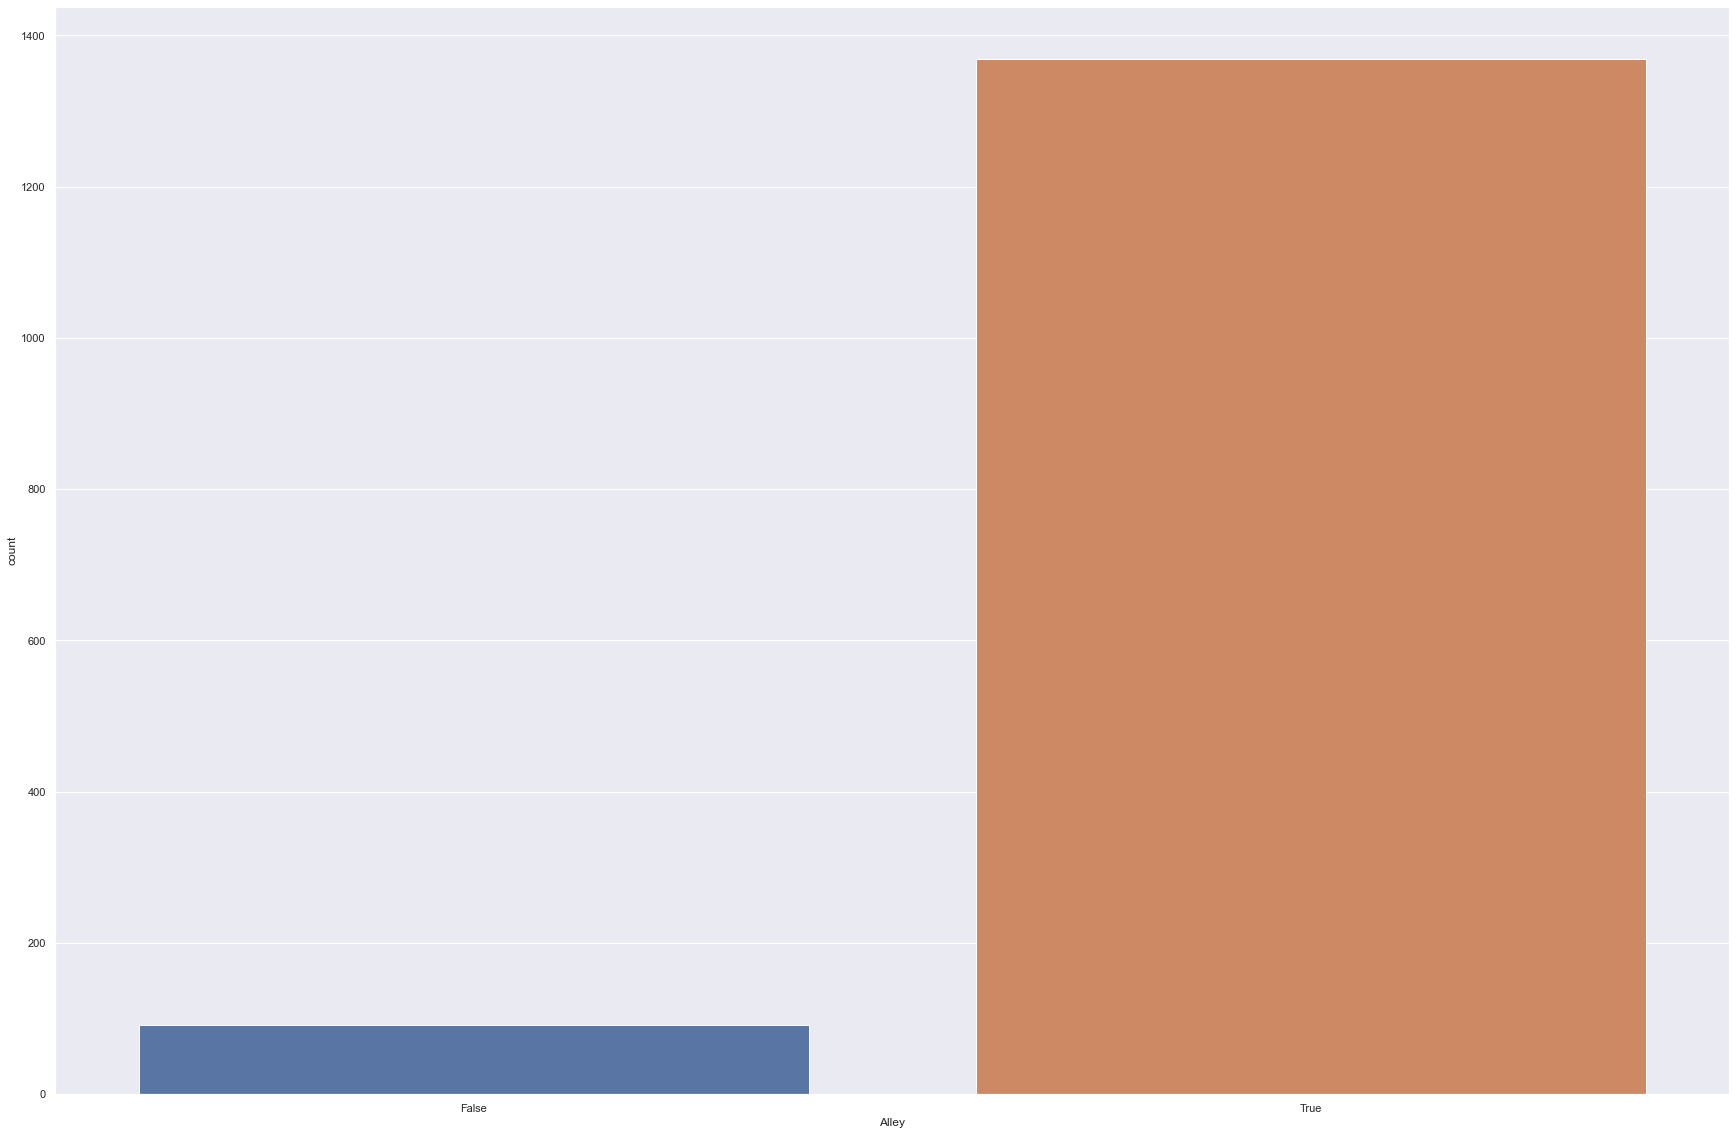

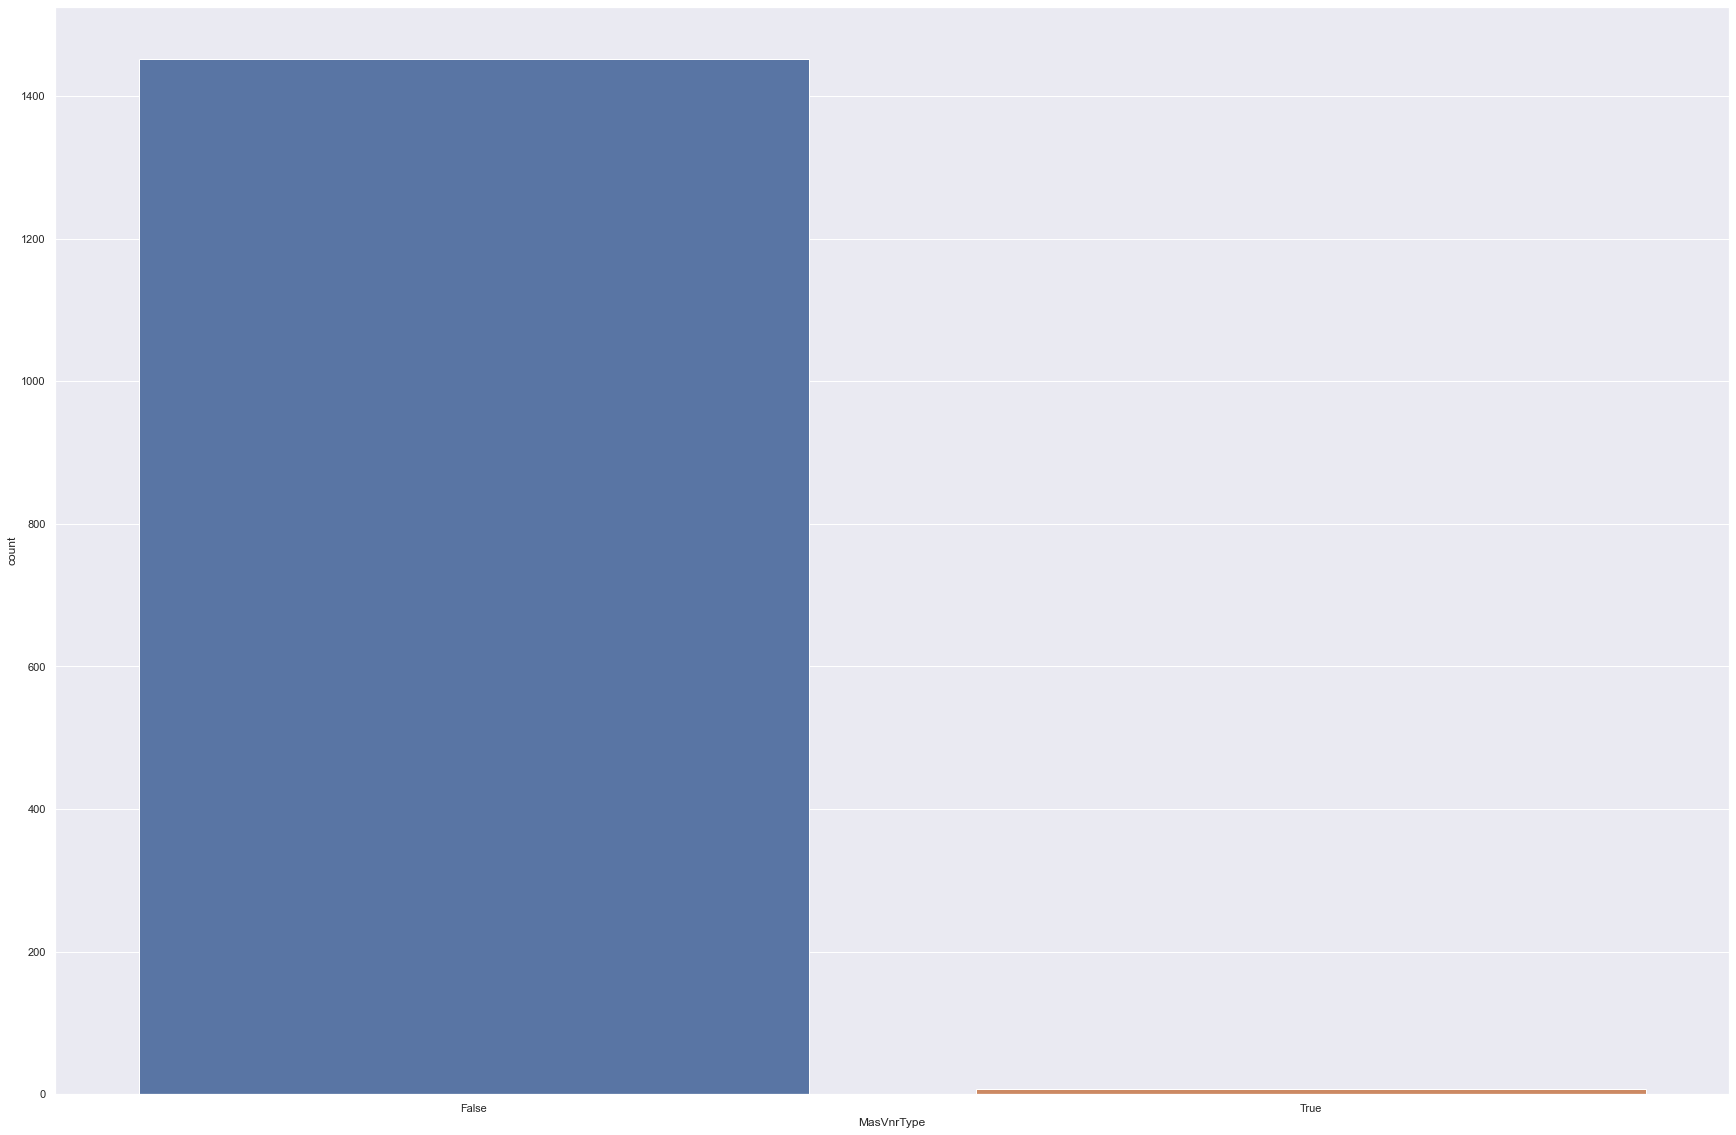

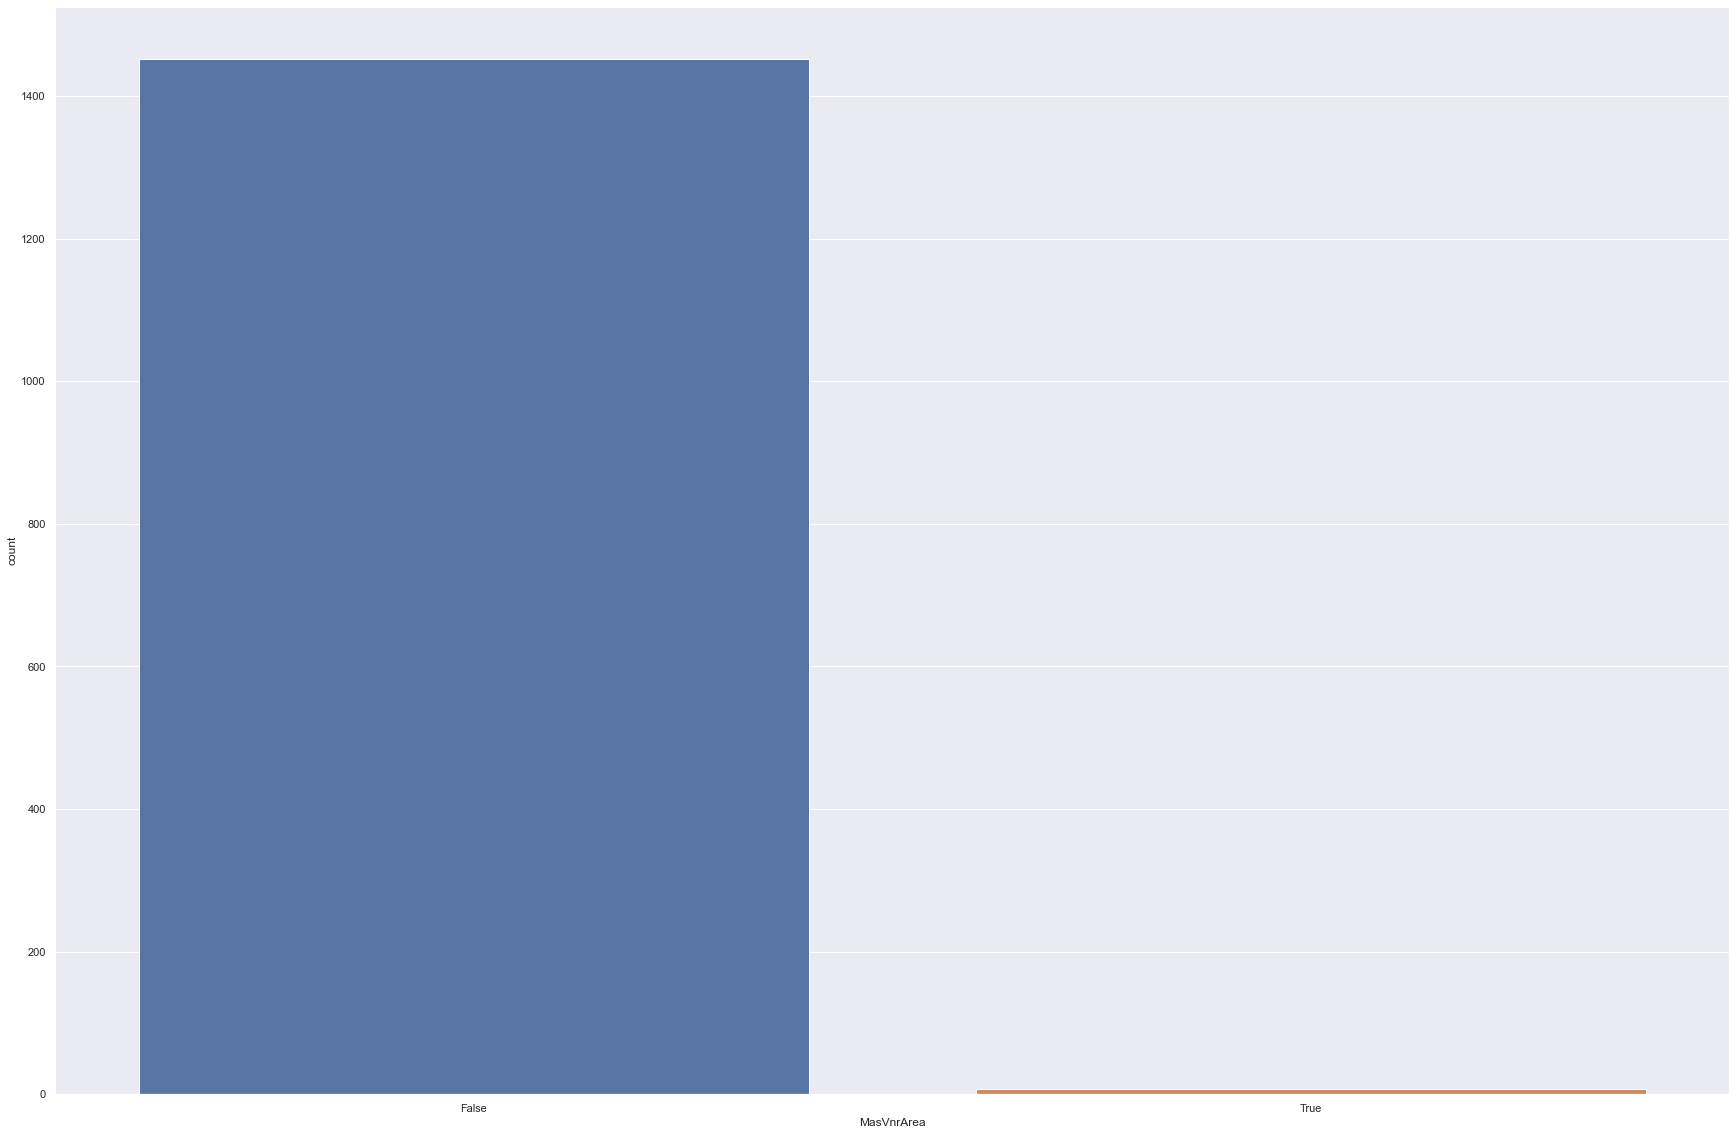

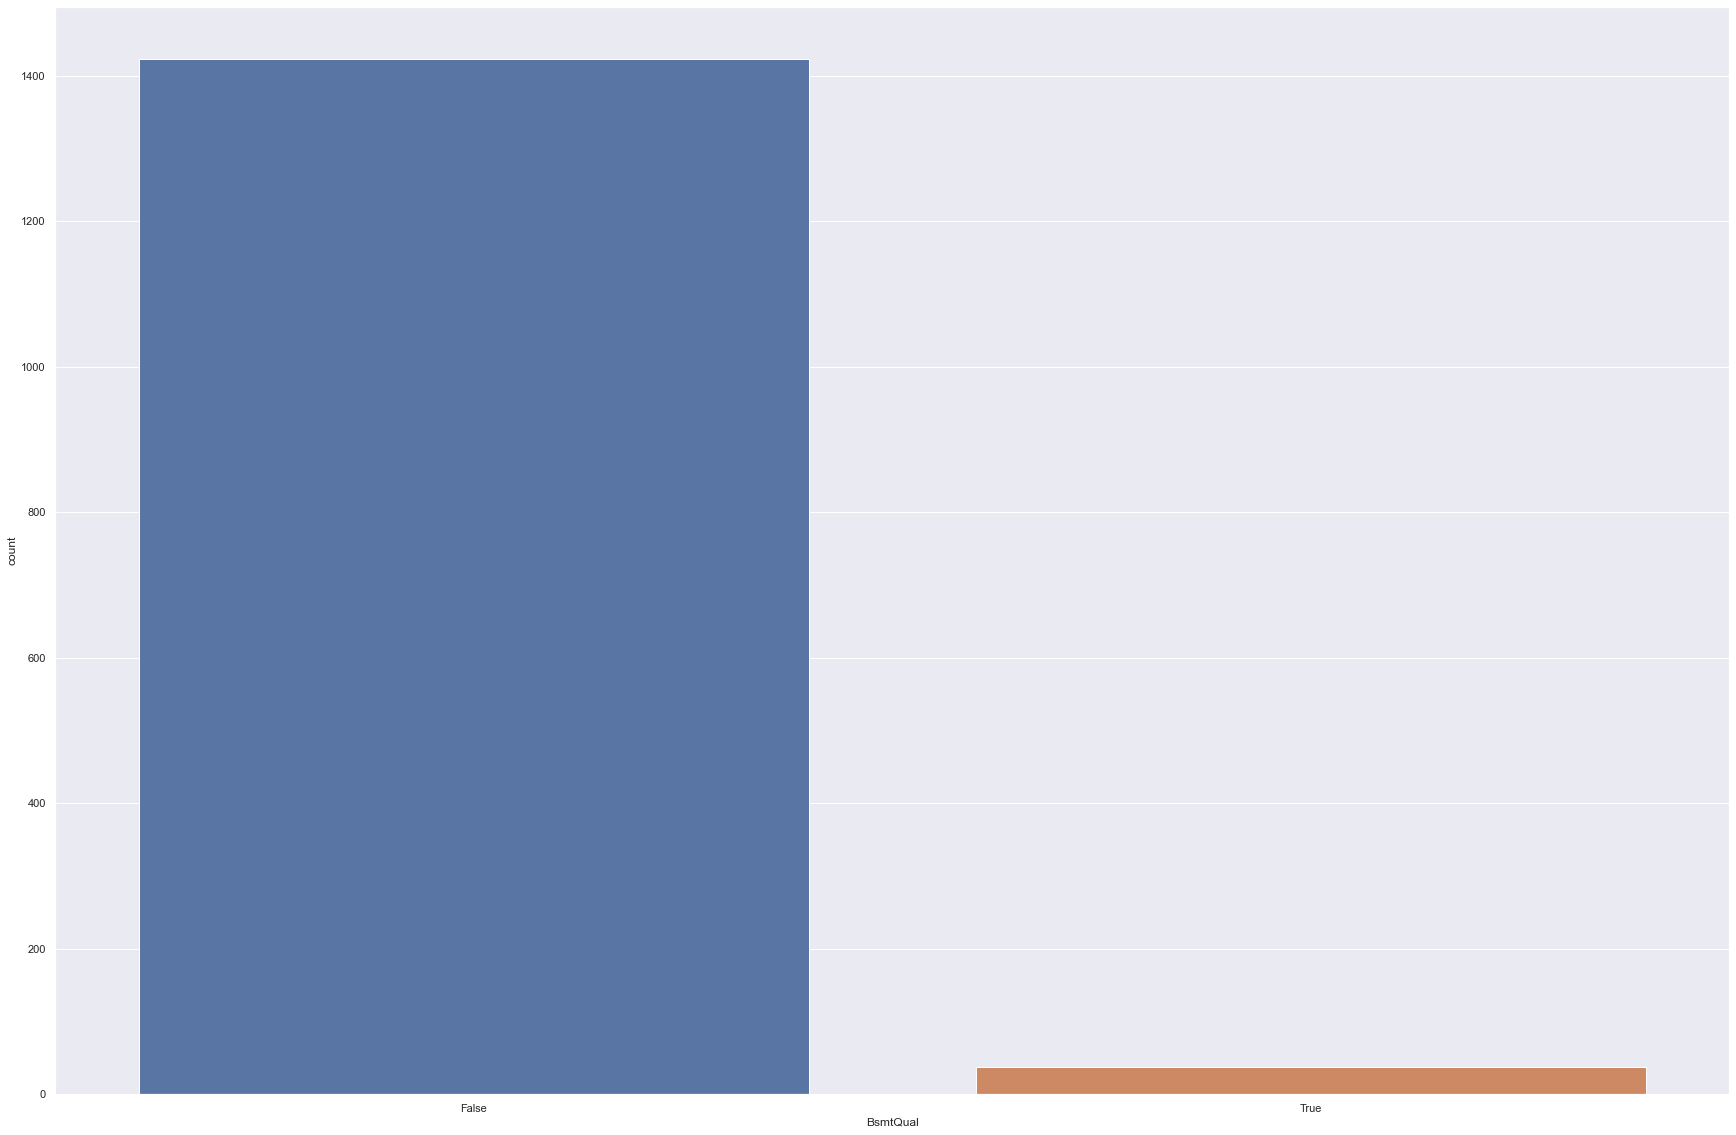

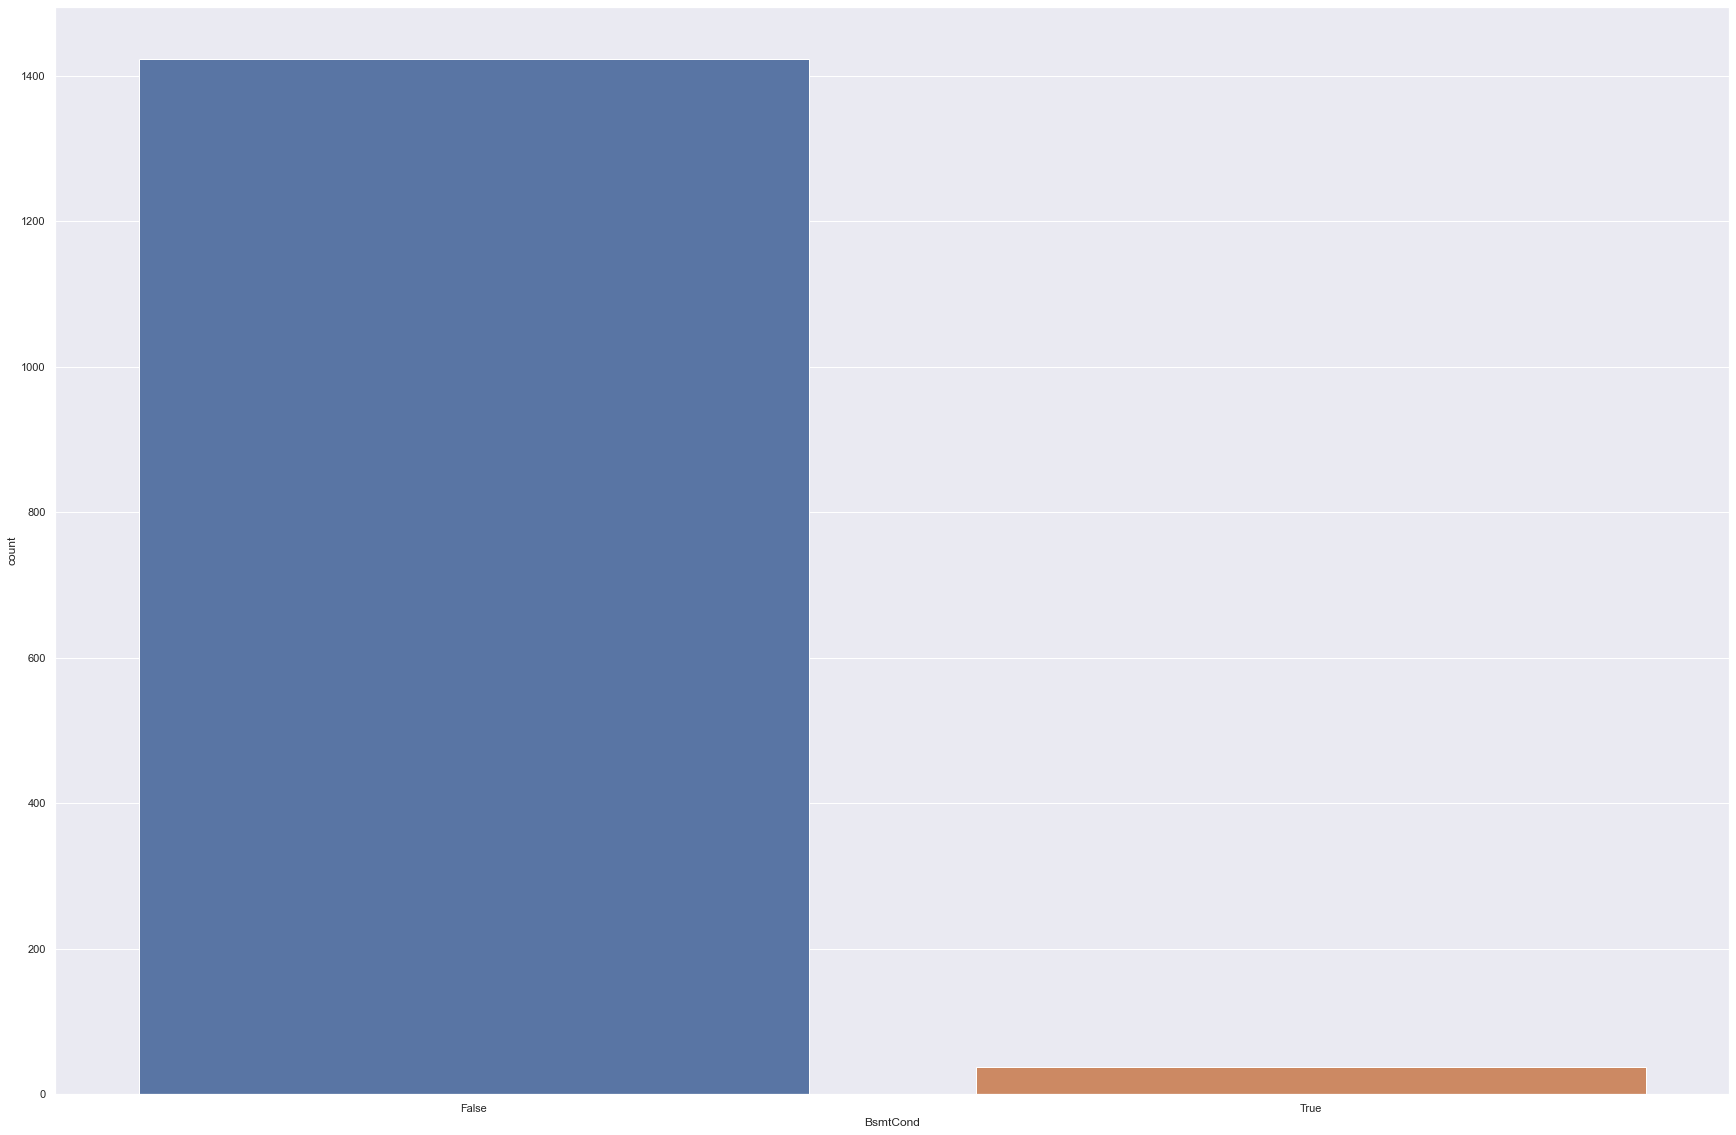

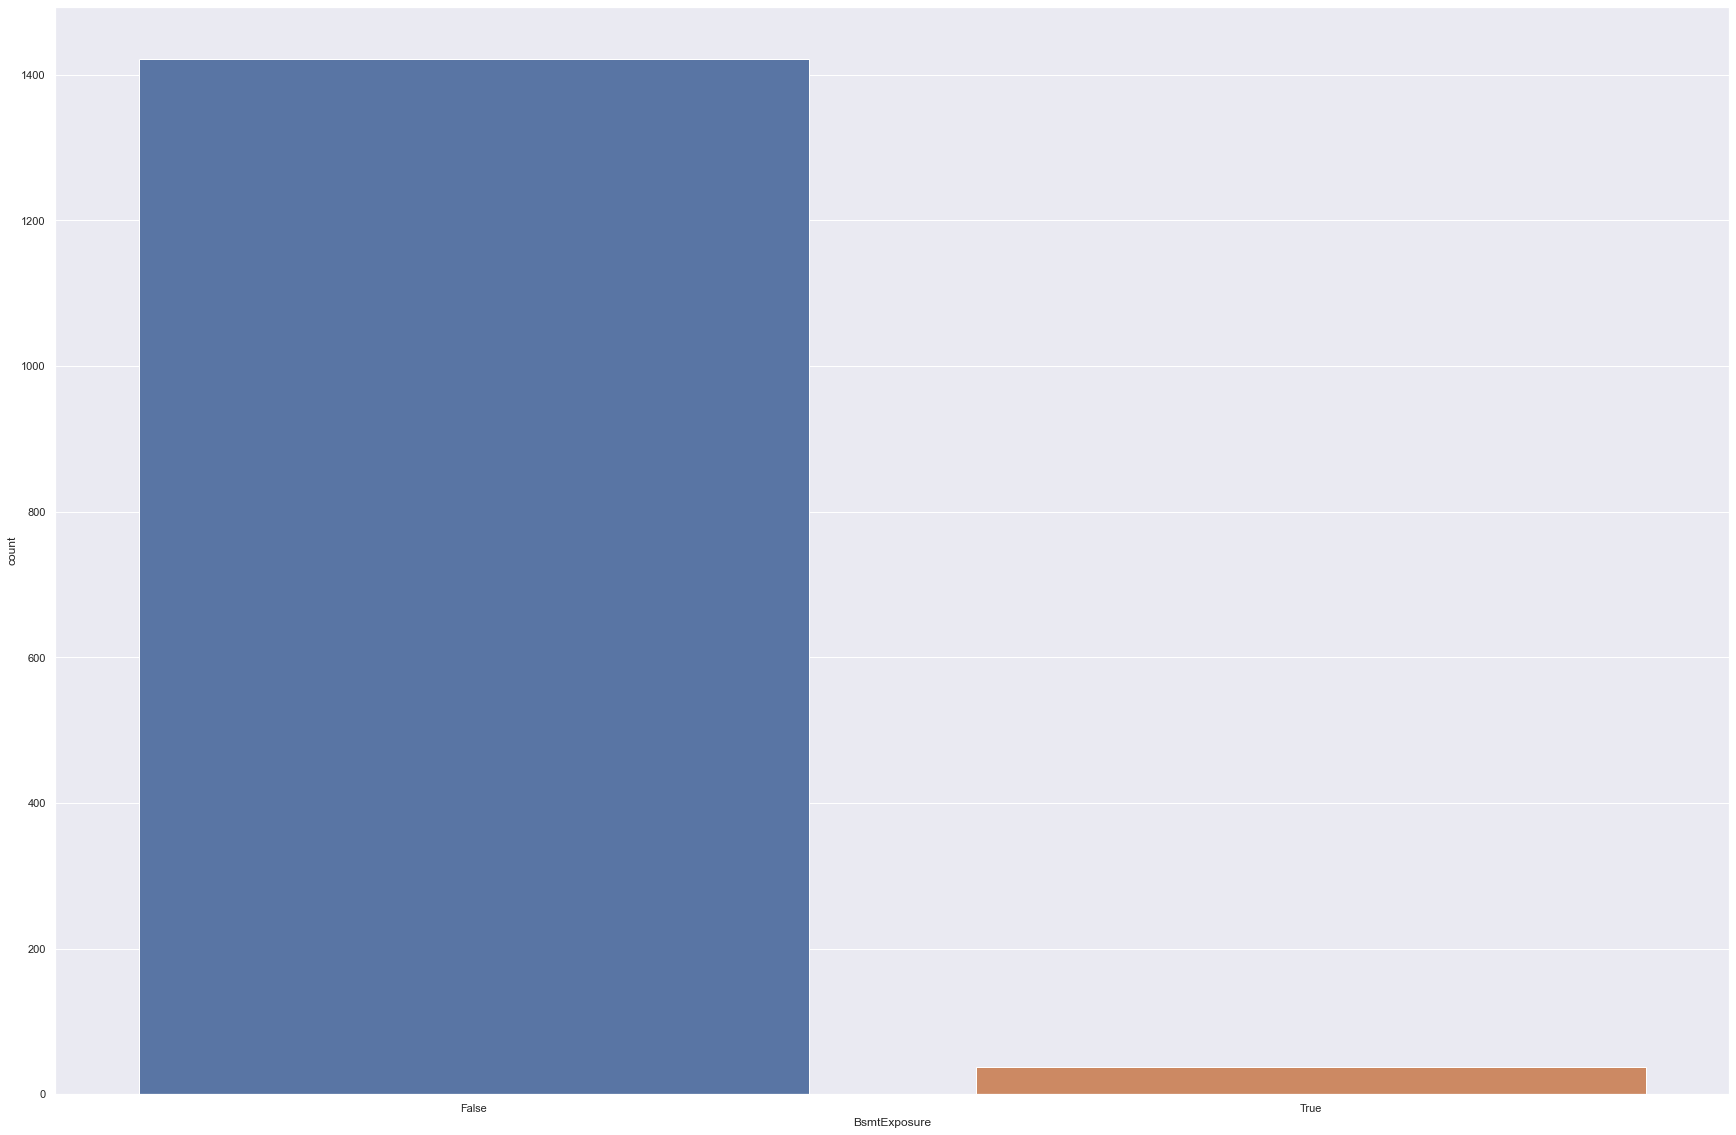

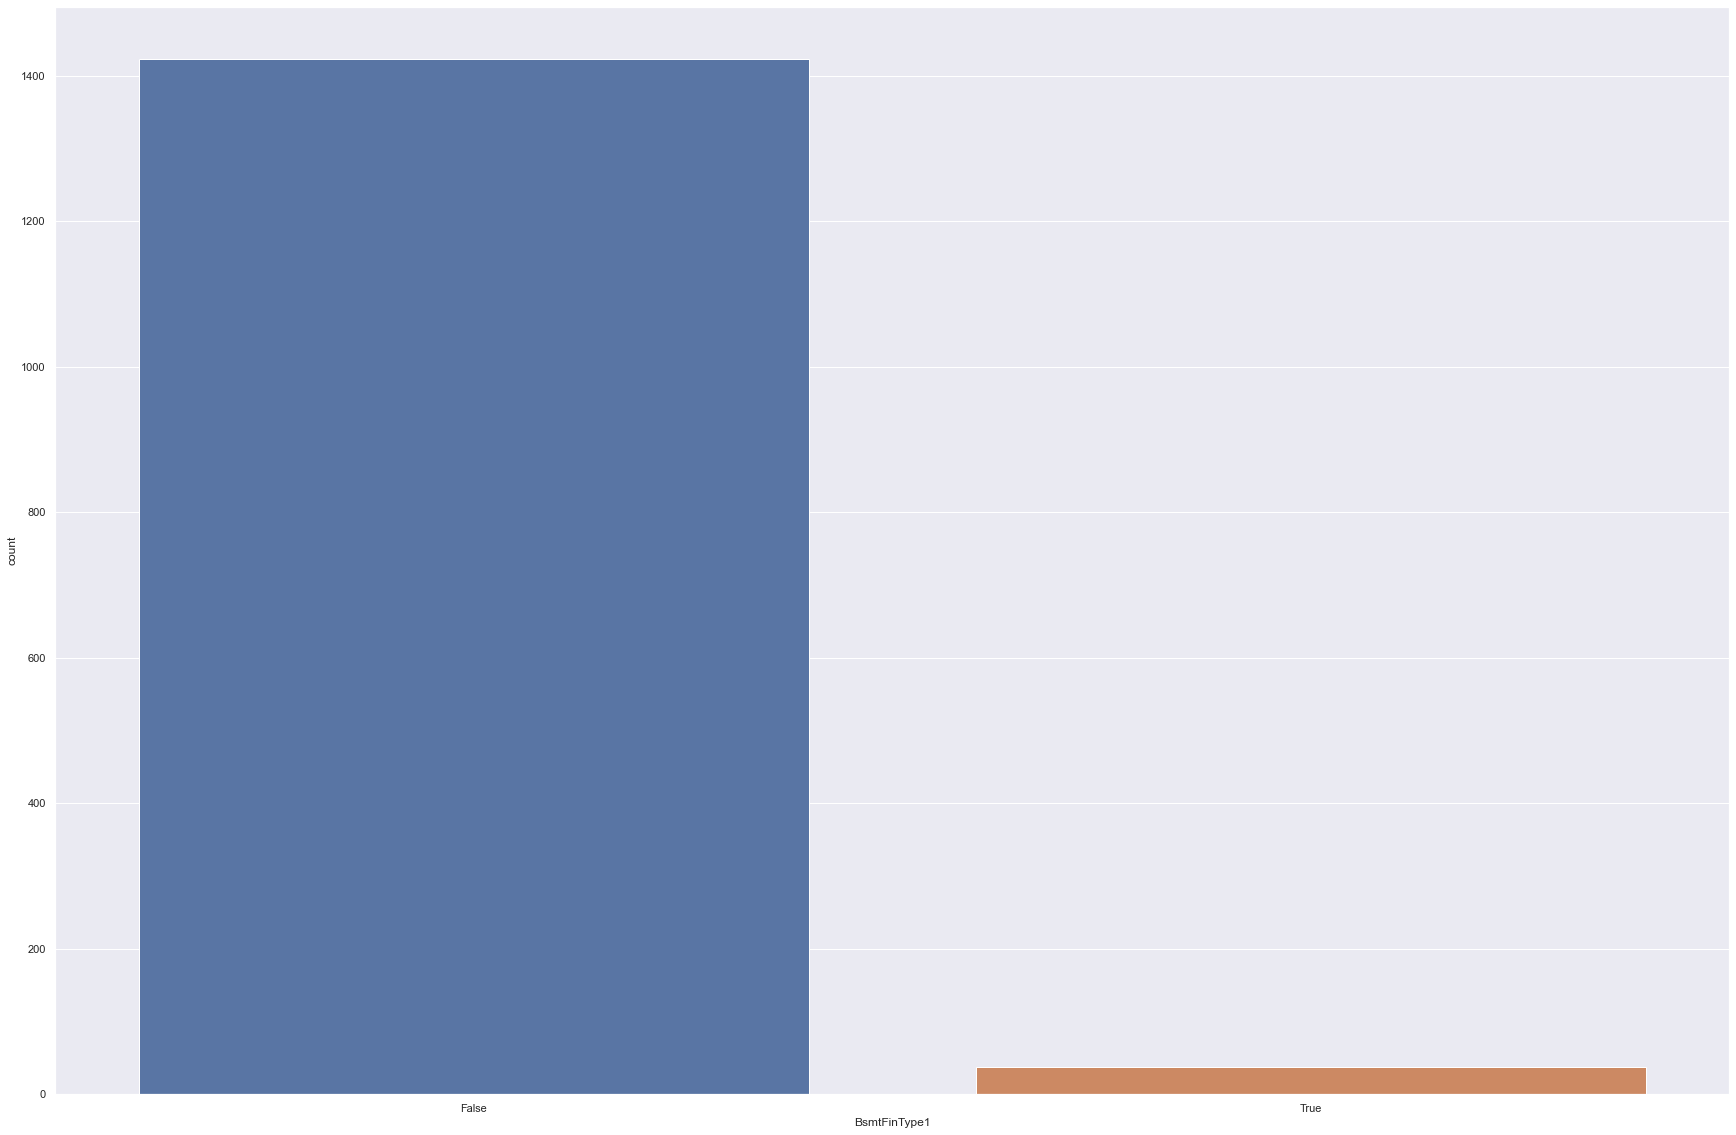

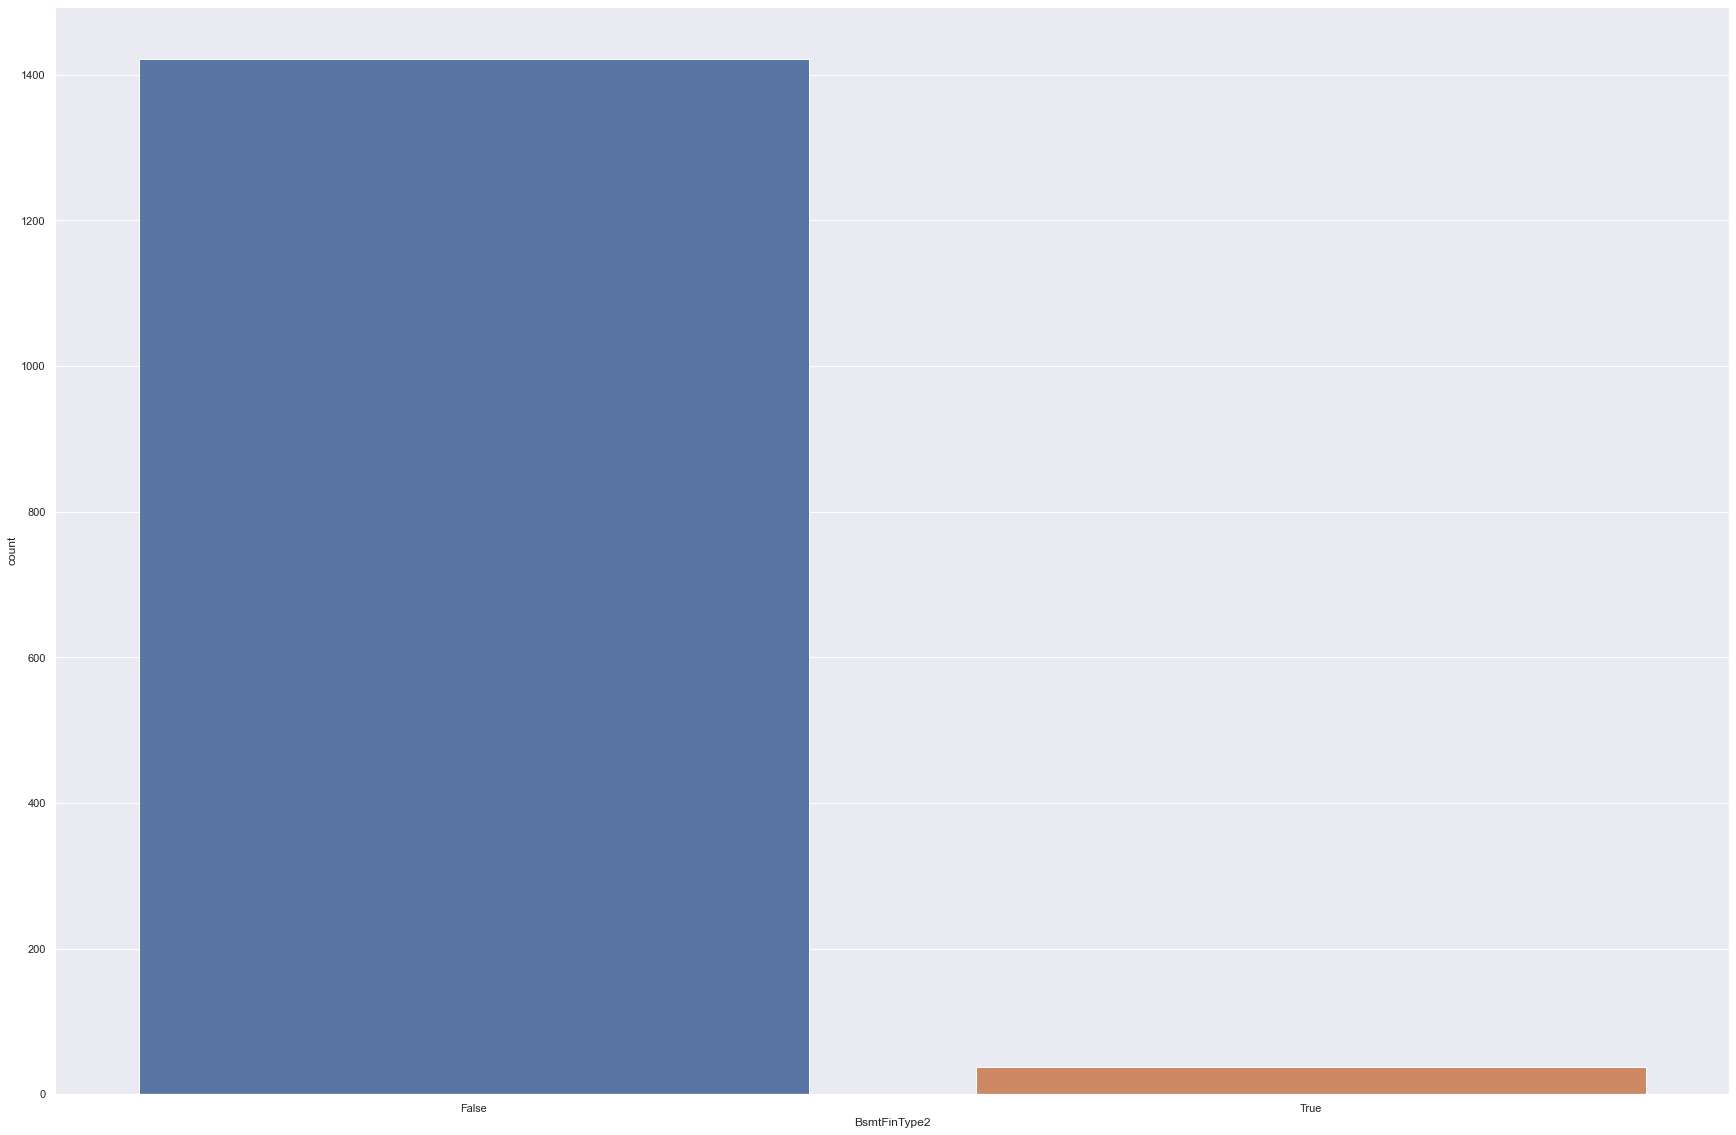

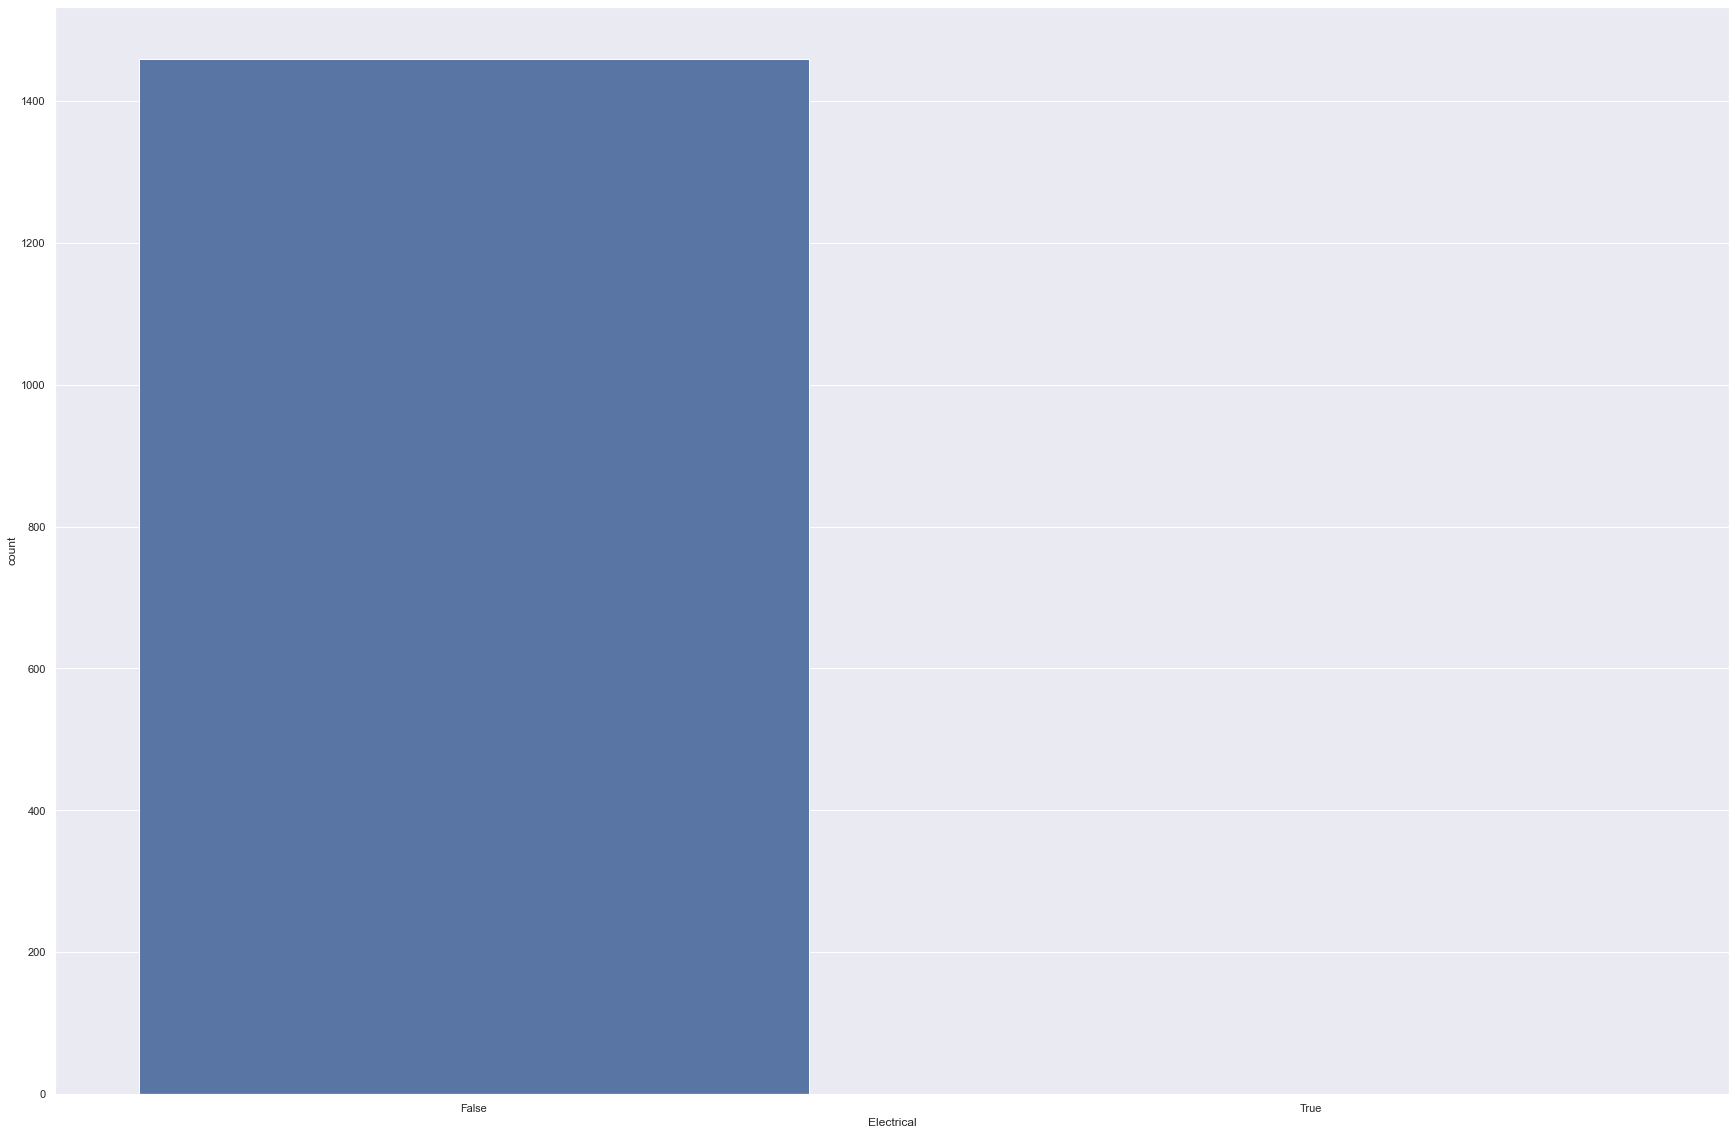

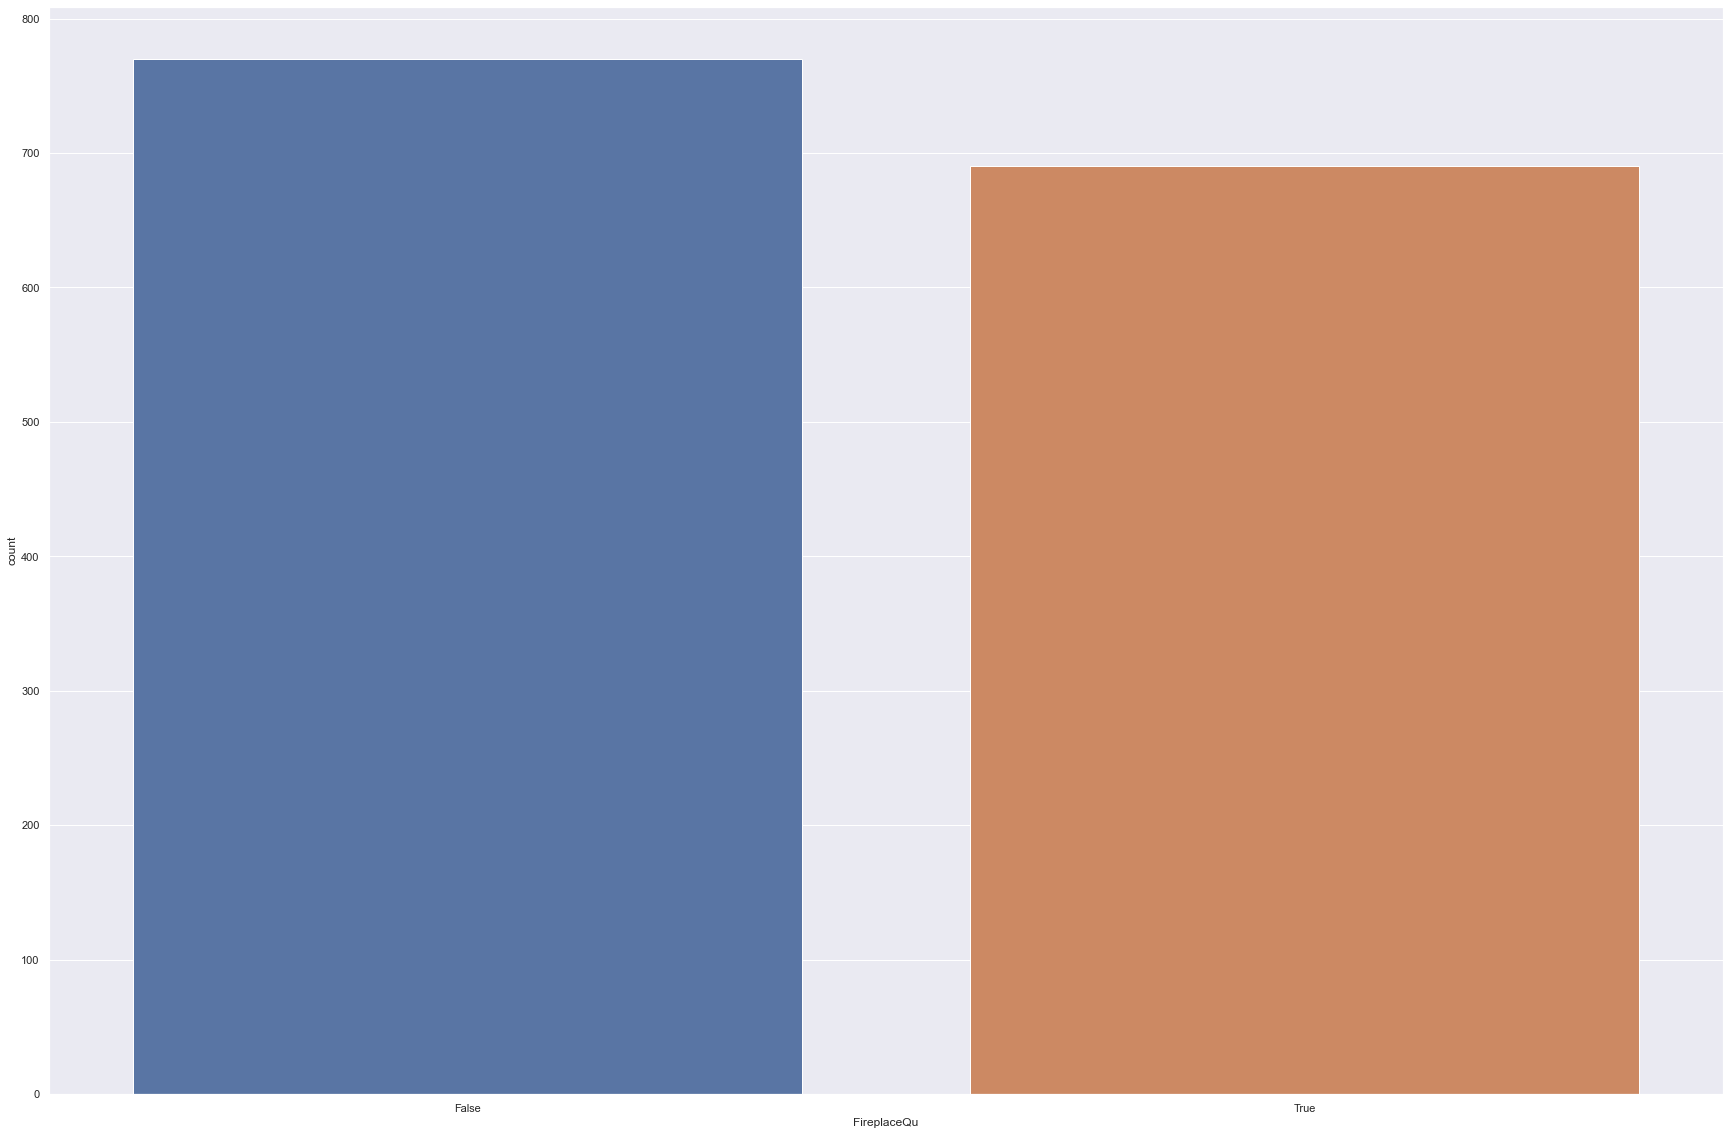

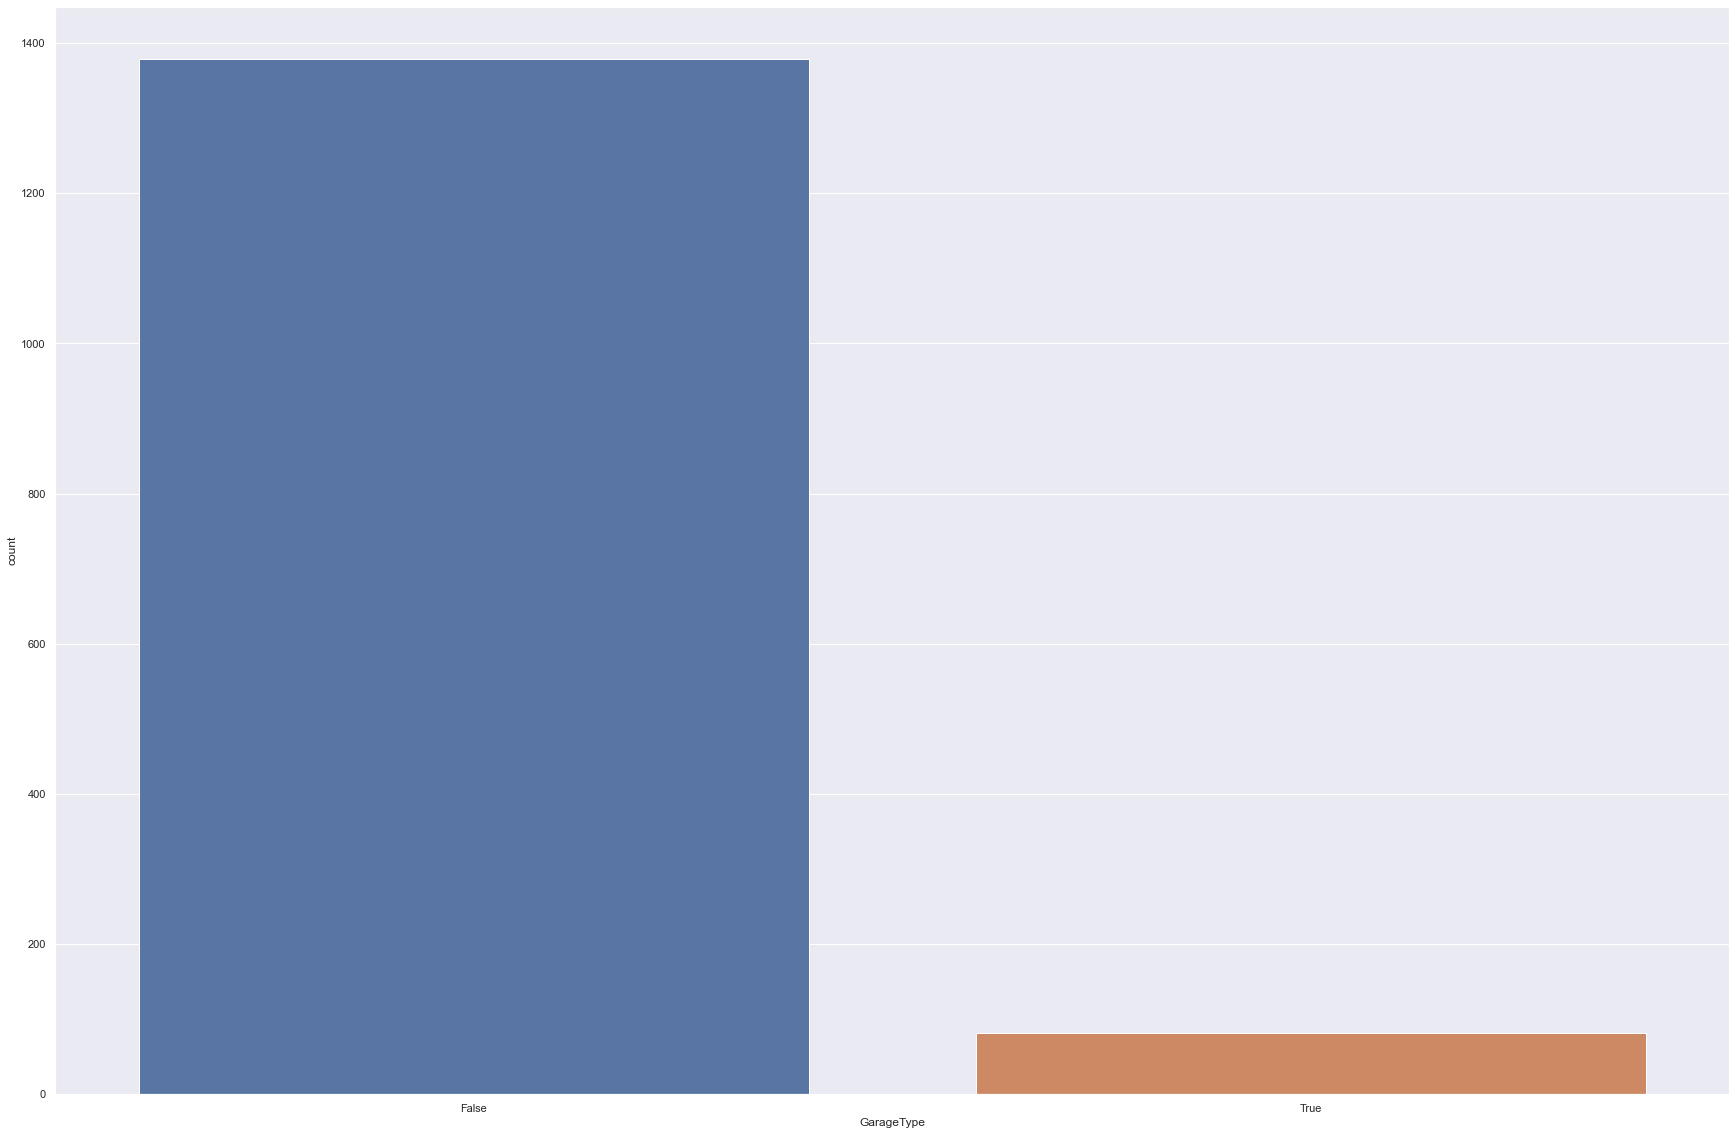

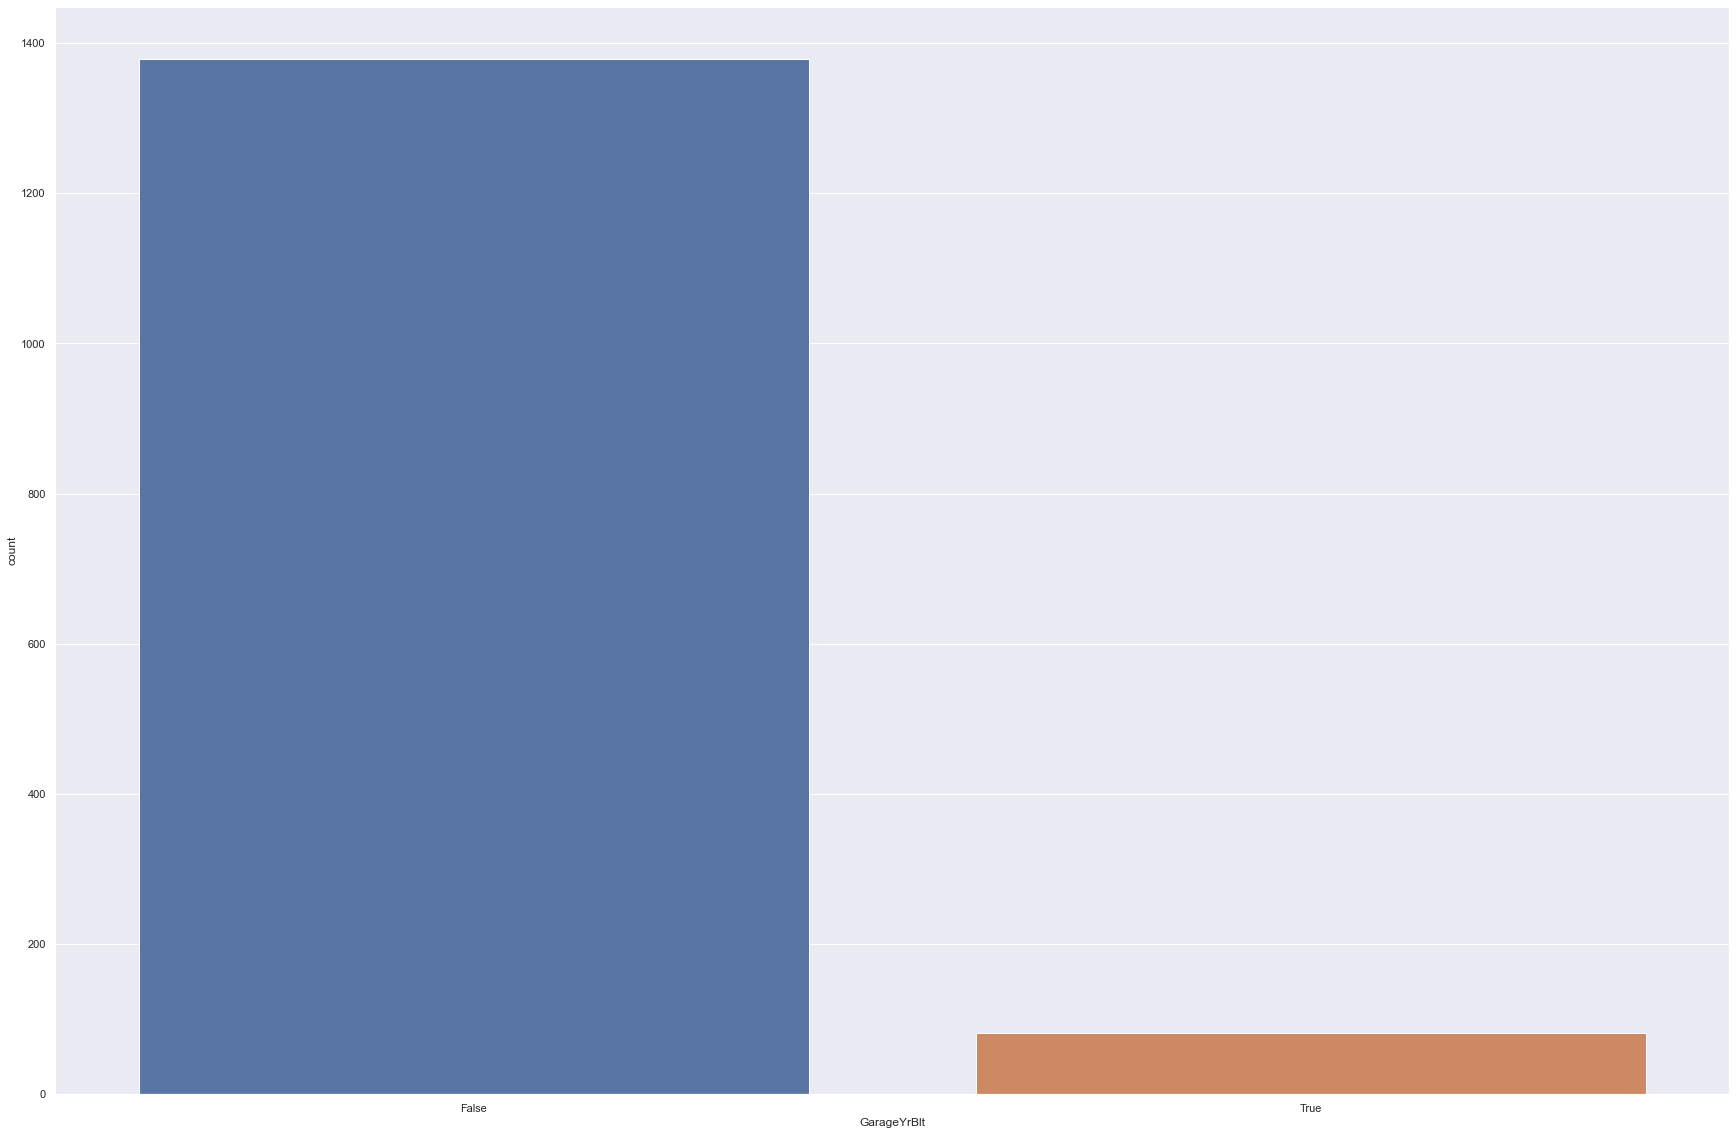

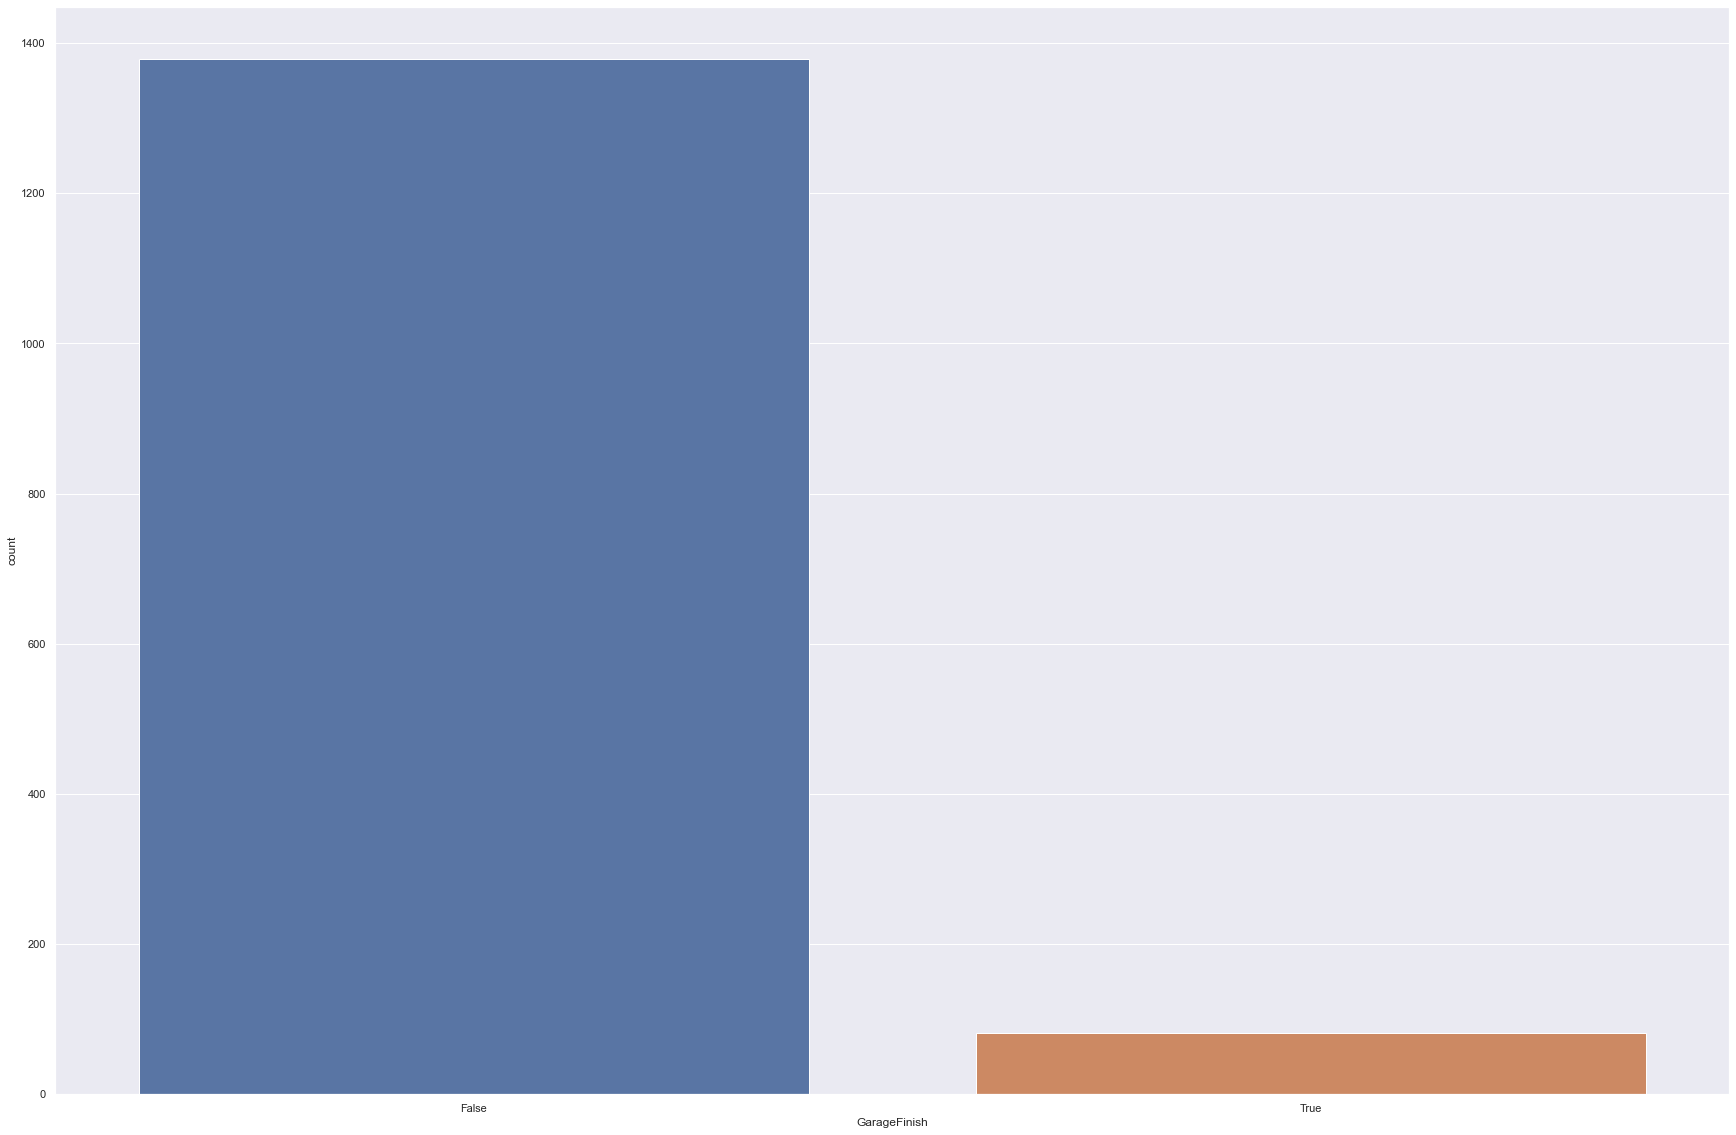

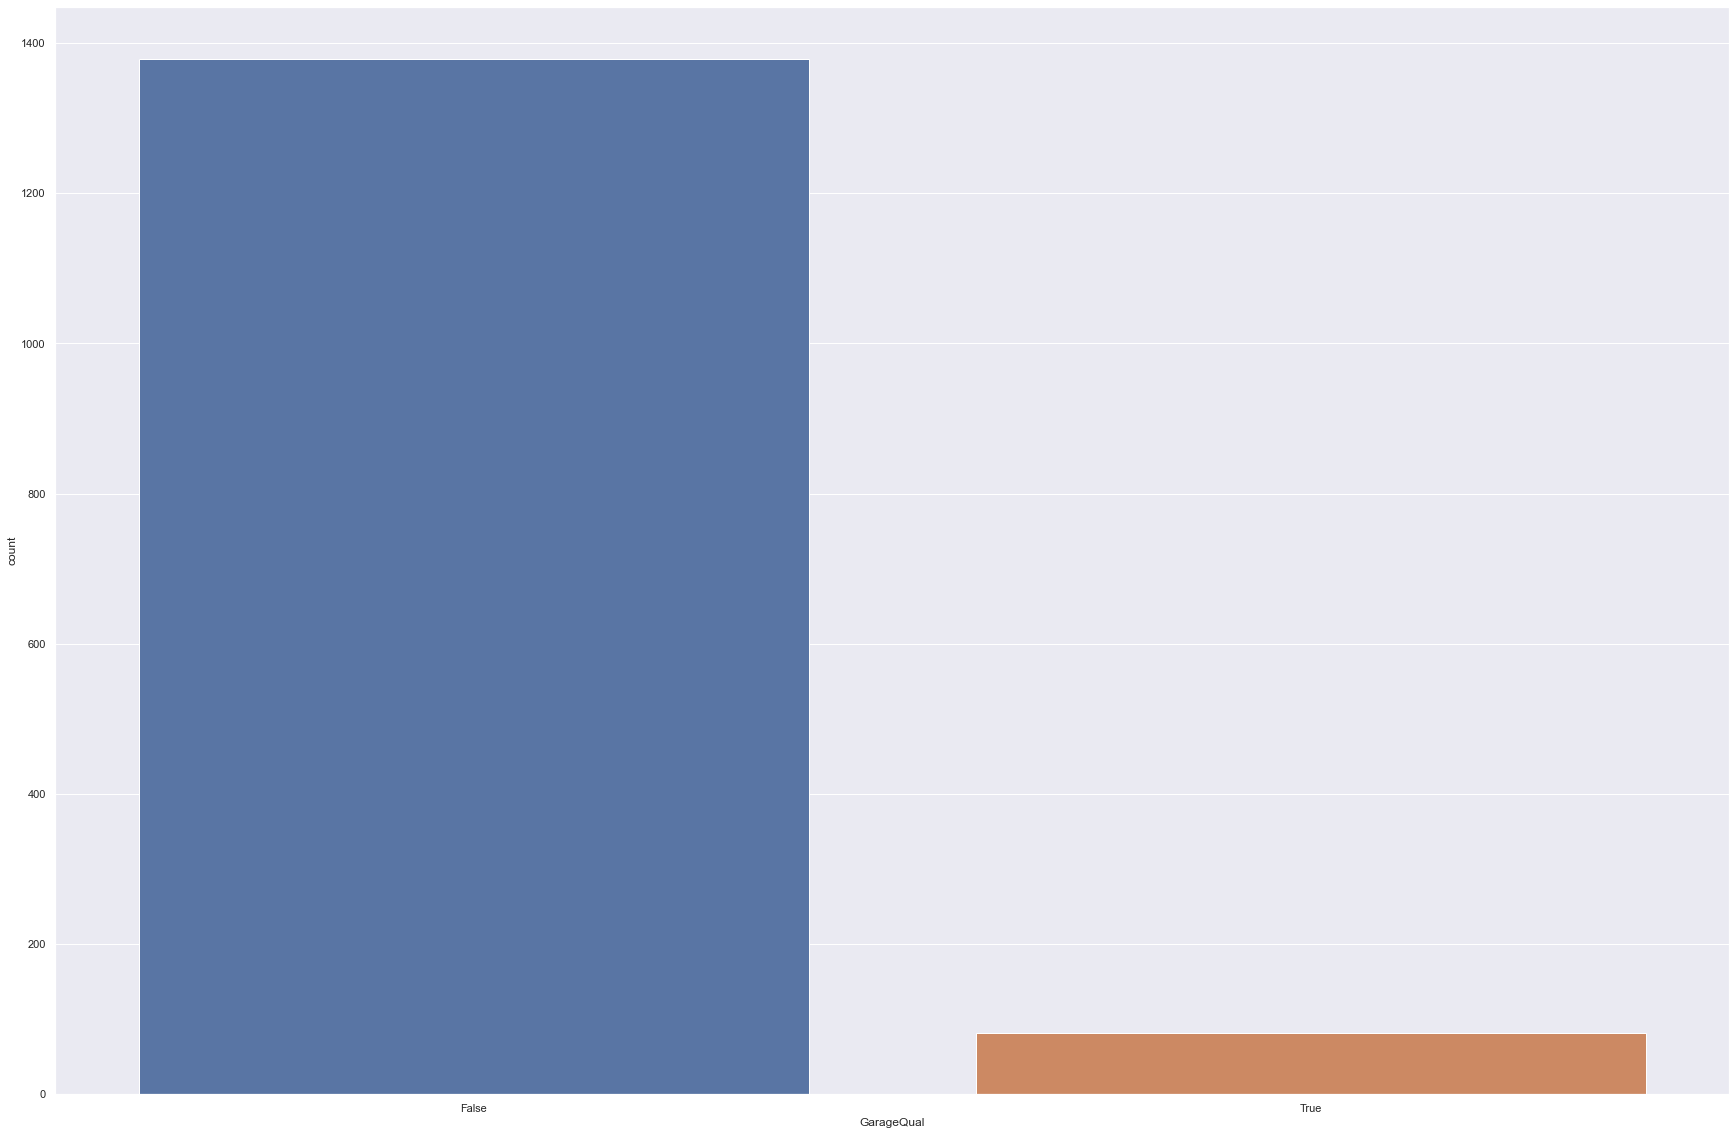

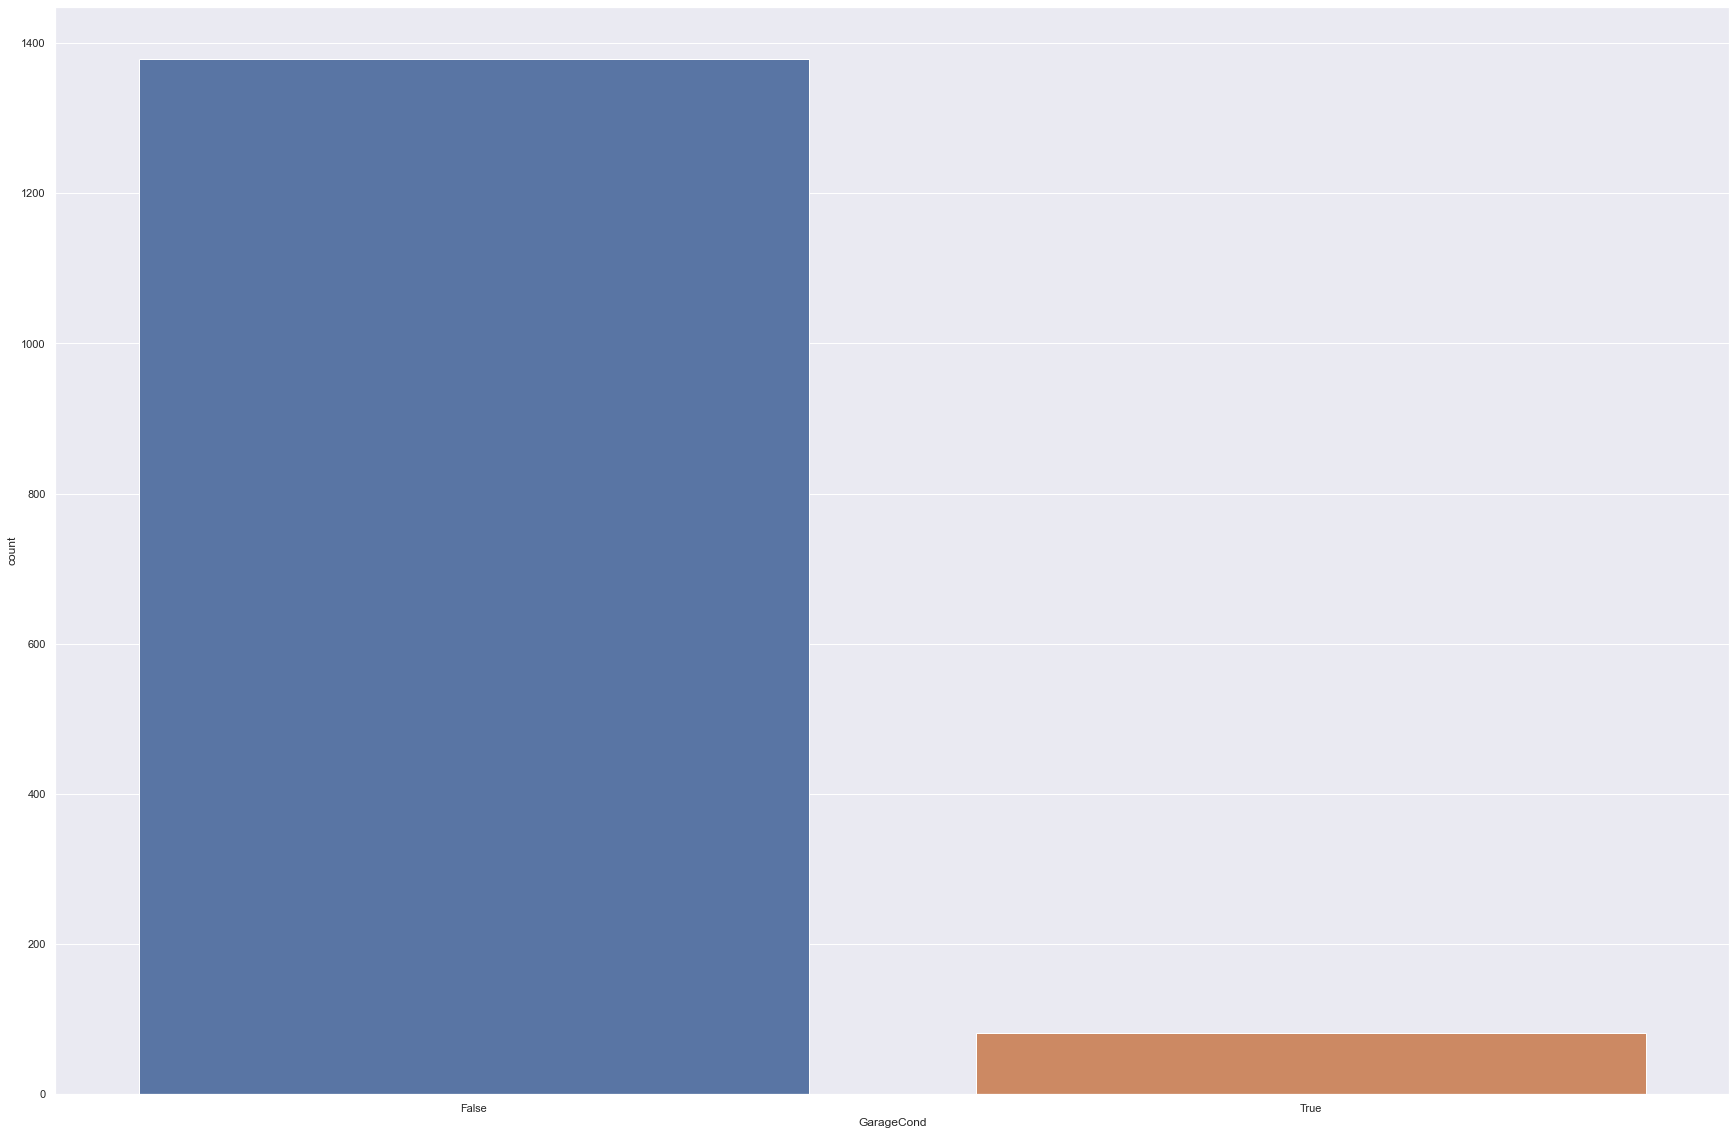

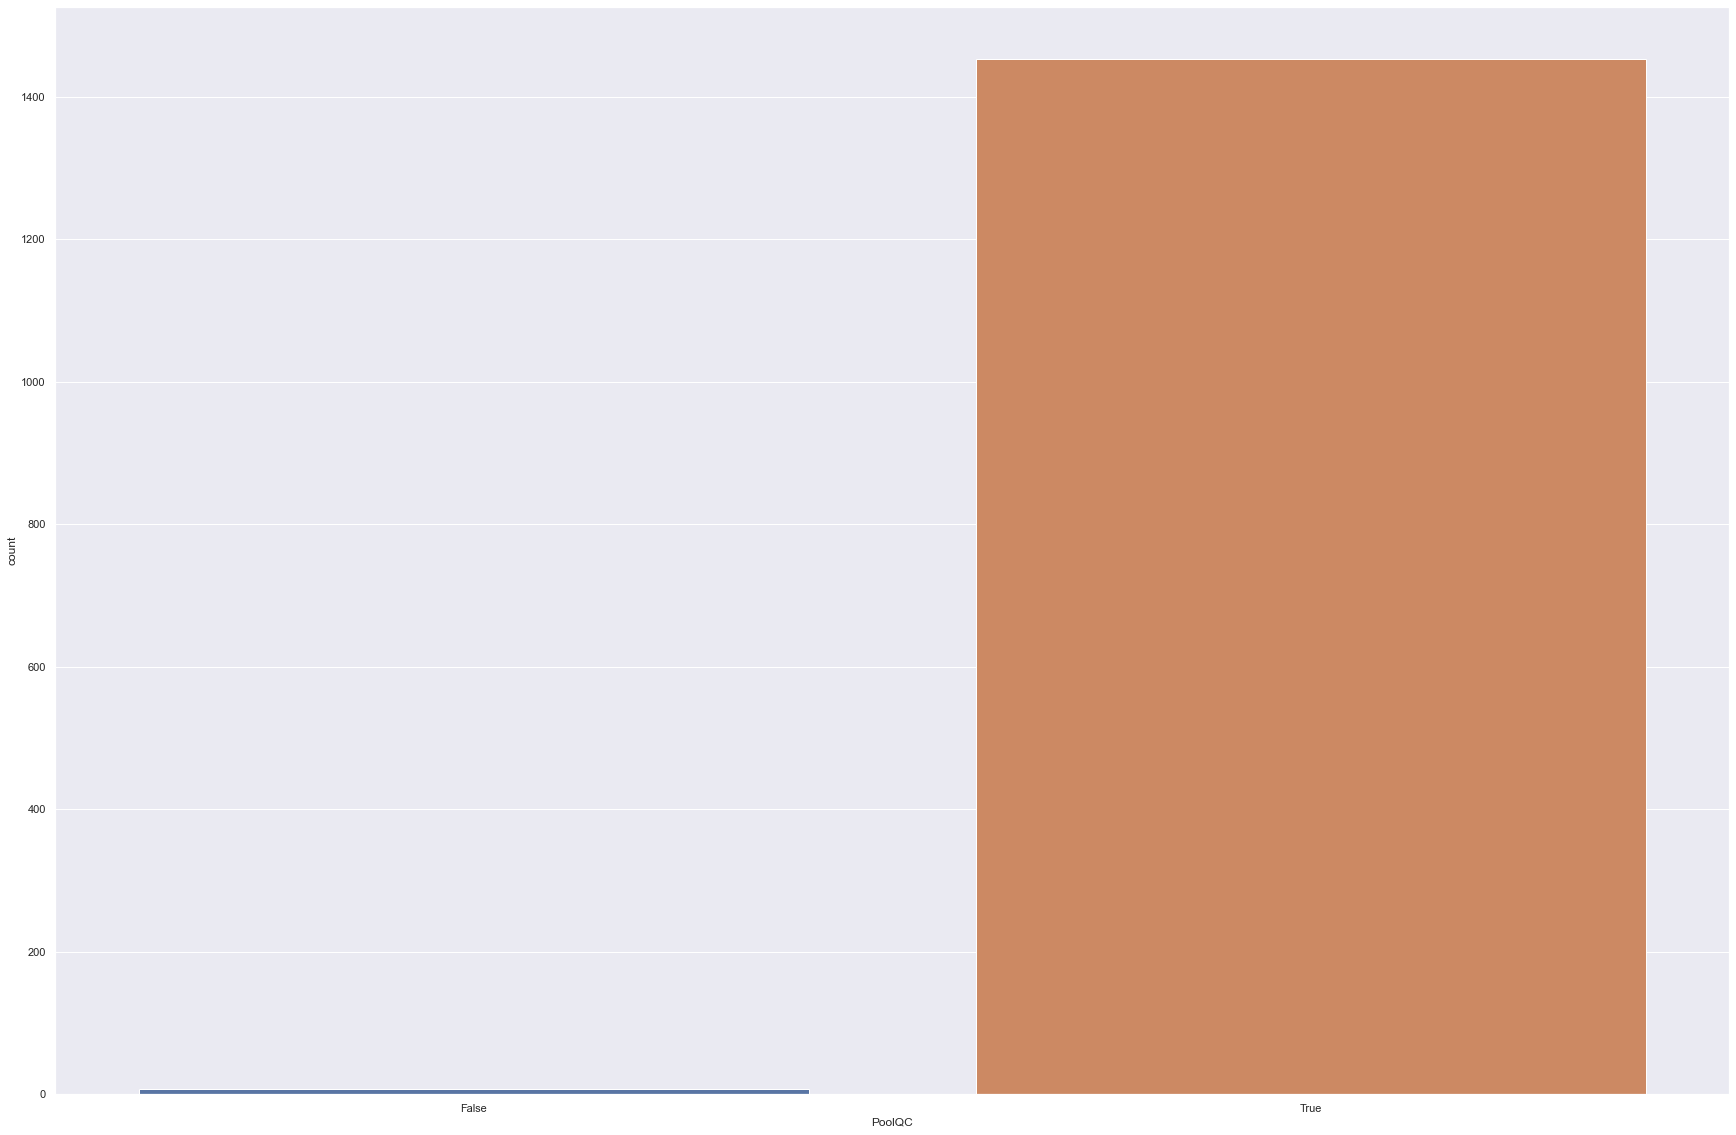

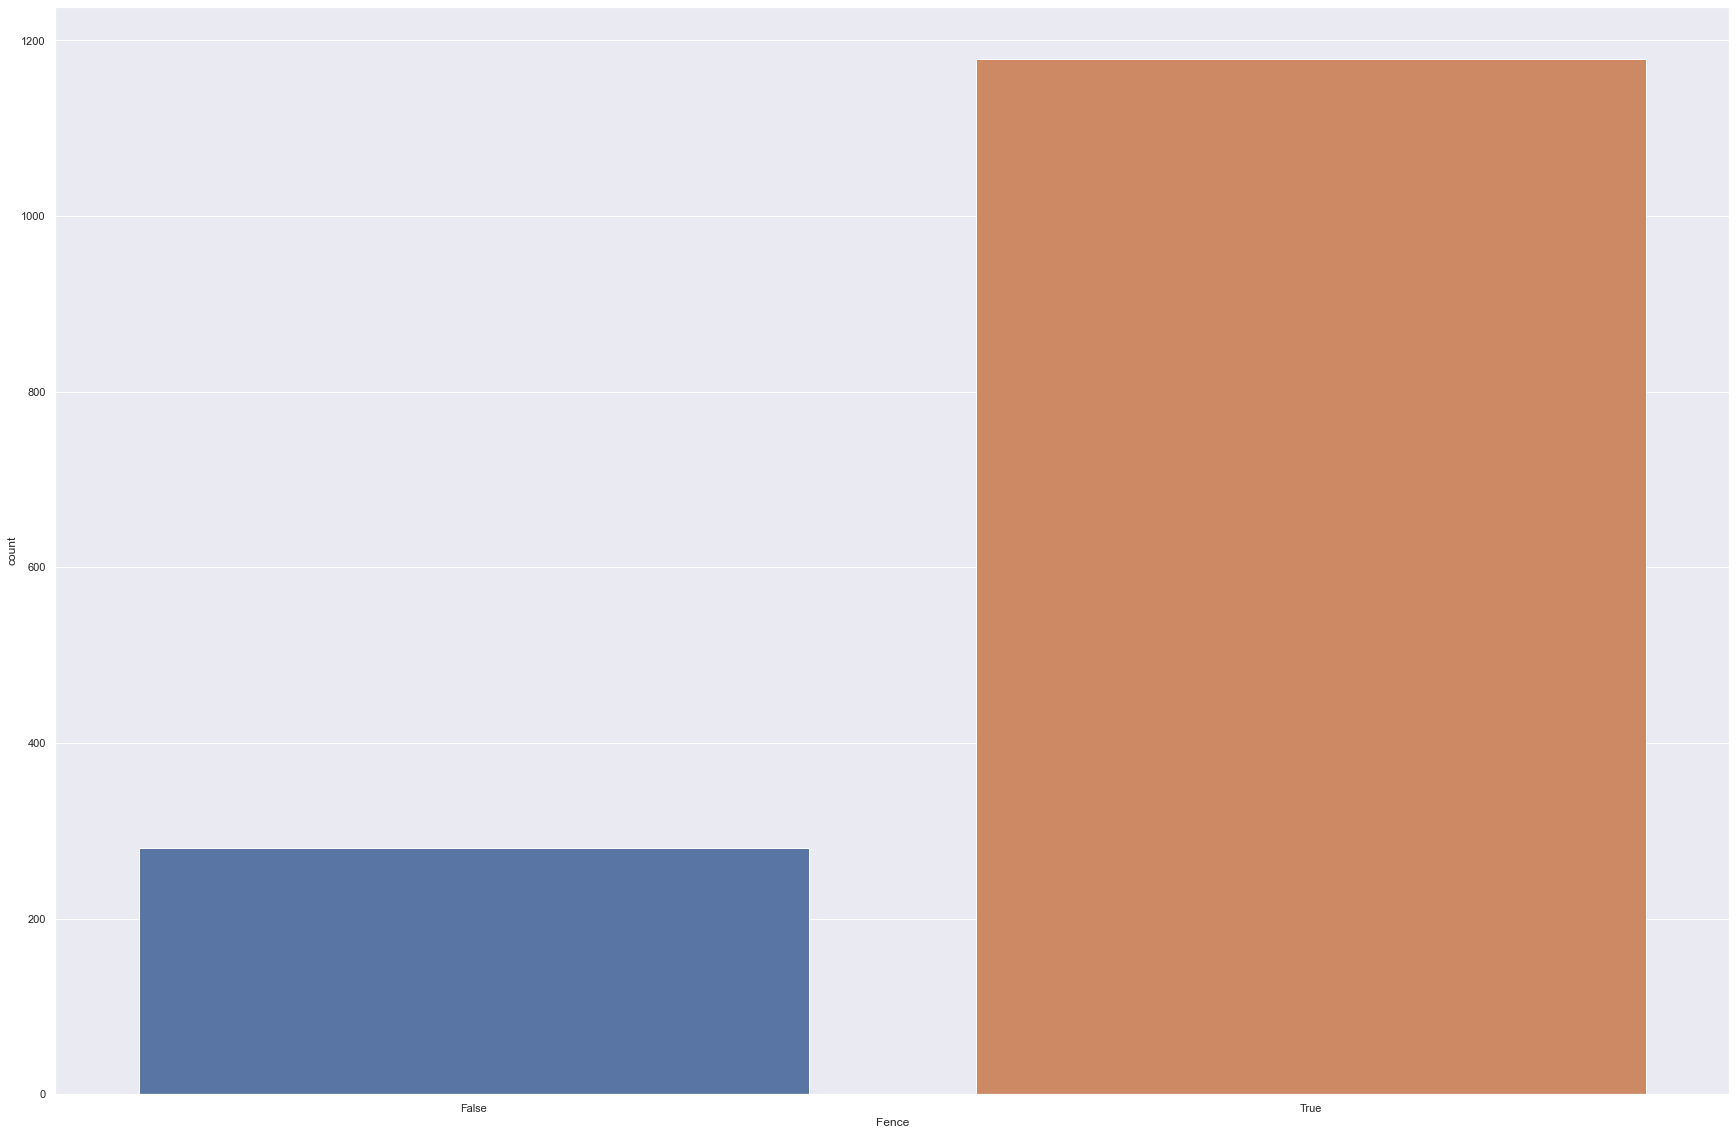

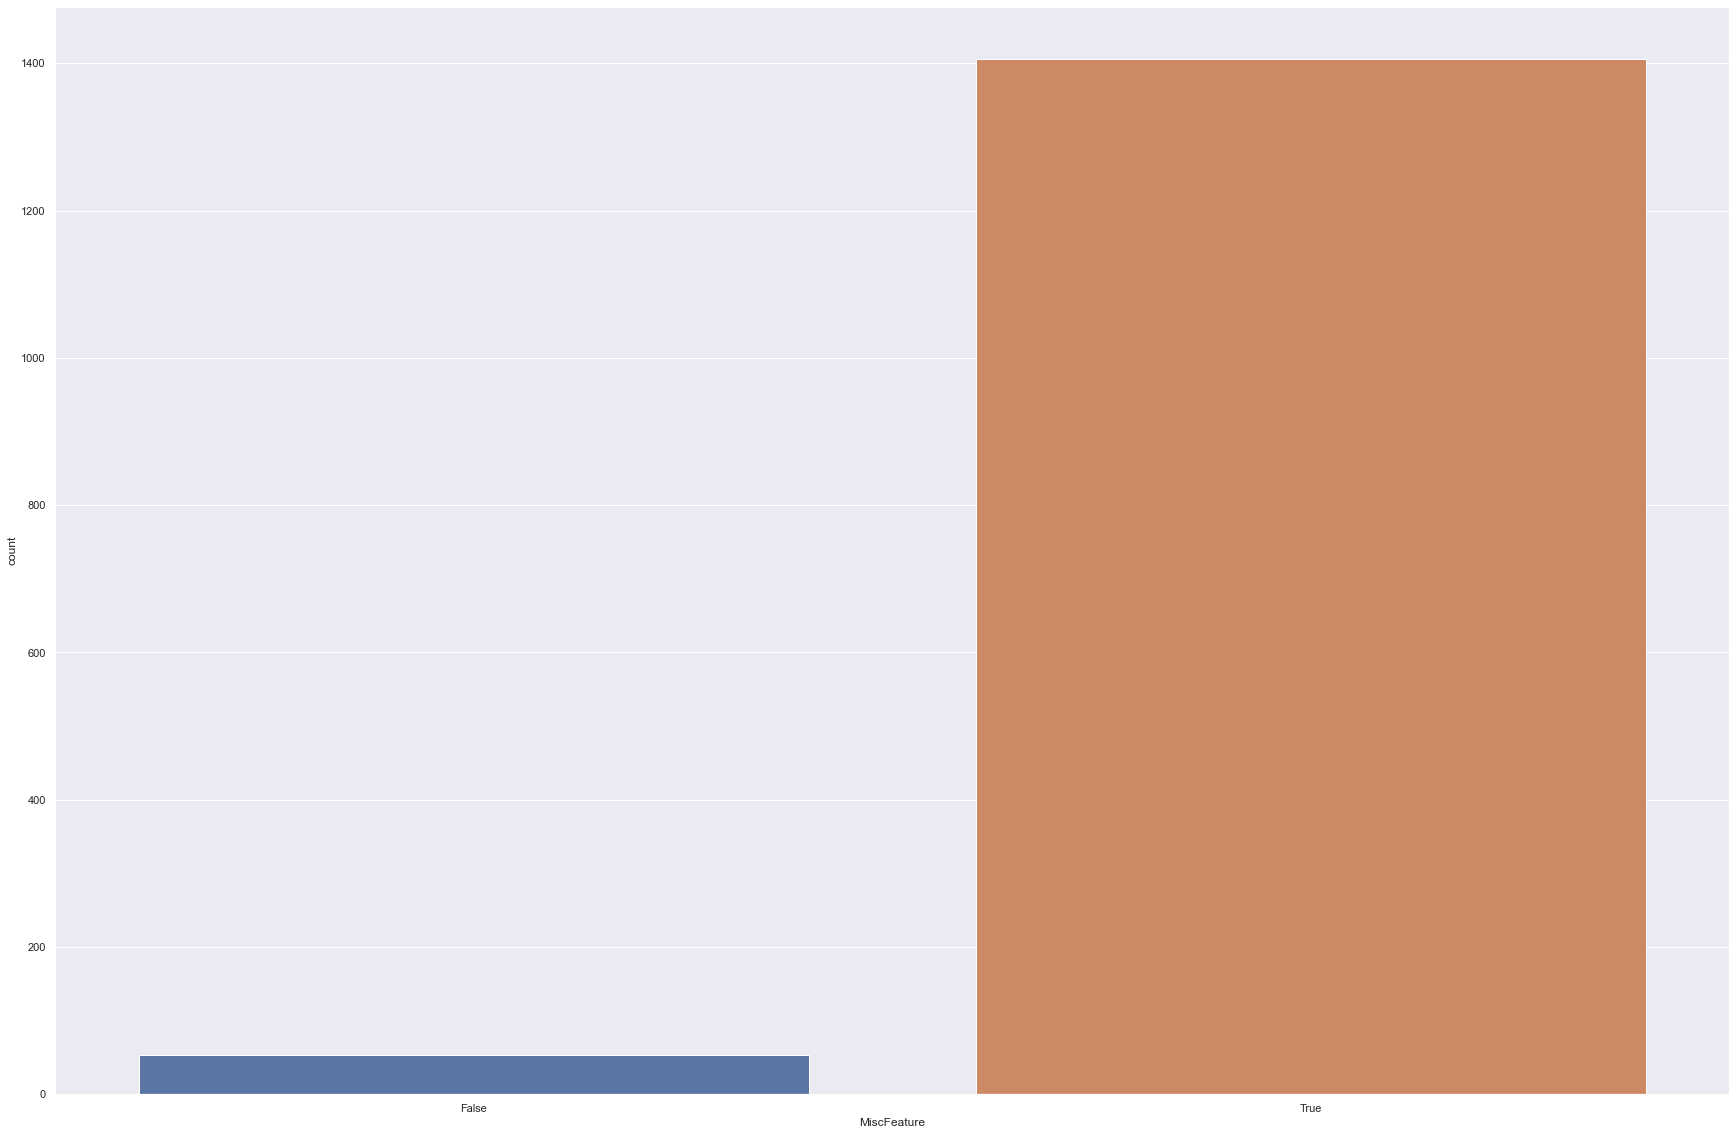

In [97]:
missing_value_analysis(missing_Values,house_data)

# Checked the significant categorical features 

In [98]:
import statsmodels.api as sm
from statsmodels.formula.api import ols 

In [99]:
#Selecting the categorical columns
cat_col = house_data.select_dtypes(include=['object']).columns

In [100]:
#Selecting the year columns
year_col = [col for col in house_data.select_dtypes(include='number') if 'Yr'  in col or 'Year'  in col ]


In [101]:
#Identification of days wrt year of selling 
year_df=pd.DataFrame([house_data['YrSold'] - house_data['YearBuilt'],house_data['YrSold'] - house_data['YearRemodAdd'],house_data['YrSold'] - house_data['GarageYrBlt']])

In [102]:
year_df.transpose()

0     1      2
0       5.0   5.0    5.0
1      31.0  31.0   31.0
2       7.0   6.0    7.0
3      91.0  36.0    8.0
4       8.0   8.0    8.0
5      16.0  14.0   16.0
6       3.0   2.0    3.0
7      36.0  36.0   36.0
8      77.0  58.0   77.0
9      69.0  58.0   69.0
10     43.0  43.0   43.0
11      1.0   0.0    1.0
12     46.0  46.0   46.0
13      1.0   0.0    1.0
14     48.0  48.0   48.0
15     78.0   6.0   16.0
16     40.0  40.0   40.0
17     39.0  39.0   39.0
18      4.0   4.0    4.0
19     51.0  44.0   51.0
20      1.0   0.0    1.0
21     77.0  57.0   77.0
22      6.0   6.0    6.0
23     31.0  31.0   31.0
24     42.0   9.0   42.0
25      2.0   2.0    2.0
26     59.0  10.0    5.0
27      3.0   2.0    2.0
28     49.0   9.0   49.0
29     81.0  58.0   88.0
30     88.0  58.0   88.0
31     42.0   2.0   42.0
32      1.0   1.0    1.0
33     51.0  51.0   51.0
34      2.0   2.0    2.0
35      2.0   1.0    2.0
36     15.0  14.0   14.0
37     55.0  19.0   55.0
38     57.0   3.0   57.0
39     53.0  53.0    NaN
40     41.0  41.0   41.0
41     48.0  48.0   48.0
42     24.0  24.0   24.0
43     33.0  28.0   31.0
44     47.0  47.0   47.0
45      5.0   5.0    5.0
46      6.0   6.0    6.0
47      1.0   1.0    1.0
48     89.0   1.0    NaN
49     41.0  41.0   41.0
50     10.0  10.0   10.0
51     72.0  56.0   21.0
52     47.0  47.0   47.0
53     25.0  19.0   25.0
54     52.0  52.0   45.0
55     44.0  44.0   44.0
56     10.0   9.0   10.0
57      2.0   2.0    2.0
58      0.0   0.0    0.0
59     36.0  36.0   35.0
60      2.0   2.0    0.0
61     87.0  11.0   72.0
62      1.0   1.0    1.0
63     89.0  60.0   20.0
64     12.0  11.0   11.0
65      3.0   2.0    3.0
66     40.0  21.0   40.0
67      4.0   4.0    4.0
68     65.0  60.0   65.0
69     53.0  53.0   53.0
70     34.0  34.0   34.0
71     25.0   1.0   20.0
72     11.0  11.0   11.0
73     56.0   7.0   21.0
74     95.0  60.0   95.0
75     36.0  36.0   36.0
76     52.0  52.0   52.0
77     60.0   7.0   60.0
78     42.0  42.0    NaN
79     99.0  28.0   43.0
80     41.0  41.0   41.0
81      8.0   8.0    8.0
82      1.0   1.0    1.0
83     47.0  47.0   33.0
84     14.0  13.0   14.0
85     15.0  14.0   15.0
86      4.0   4.0    4.0
87      0.0   0.0    0.0
88     94.0  27.0    NaN
89     13.0  12.0    NaN
90     56.0  56.0   56.0
91     45.0  45.0   45.0
92     88.0   3.0   88.0
93     97.0   9.0  107.0
94     10.0  10.0   10.0
95     16.0  16.0   16.0
96      7.0   7.0    7.0
97     42.0  42.0   42.0
98     90.0  60.0   90.0
99     51.0  51.0    NaN
100    33.0   9.0   33.0
101    25.0  25.0   25.0
102    30.0  30.0   30.0
103     1.0   1.0    1.0
104    76.0  57.0   56.0
105     5.0   4.0    5.0
106   122.0  12.0   53.0
107    60.0  58.0   60.0
108    88.0   2.0    NaN
109    33.0  33.0   33.0
110    52.0  34.0   52.0
111    10.0  10.0   10.0
112     0.0   0.0    0.0
113    54.0  54.0   54.0
114    62.0   5.0   62.0
115     8.0   8.0    8.0
116    47.0  47.0   47.0
117     1.0   0.0    0.0
118    20.0  20.0   20.0
119     1.0   0.0    1.0
120    37.0  37.0   37.0
121    68.0  57.0   28.0
122    50.0  50.0   50.0
123    15.0  15.0   15.0
124    30.0  11.0   30.0
125    71.0  24.0    NaN
126    31.0  31.0   30.0
127    77.0  57.0    NaN
128    40.0  40.0   40.0
129    48.0  15.0    8.0
130    40.0  40.0   40.0
131     9.0   9.0    9.0
132    48.0   5.0   33.0
133     8.0   7.0    8.0
134    38.0  13.0   38.0
135    38.0  38.0   38.0
136    40.0  40.0   40.0
137    18.0  17.0   17.0
138     9.0   8.0    9.0
139    12.0  12.0   12.0
140    39.0  39.0    NaN
141     1.0   1.0    1.0
142    58.0  58.0   10.0
143    10.0  10.0   10.0
144    43.0  43.0   43.0
145     2.0   0.0    2.0
146    78.0  16.0   78.0
147     9.0   9.0    9.0
148     4.0   3.0    NaN
149    70.0  56.0   70.0
150    32.0  32.0   32.0
151     1.0   0.0    1.0
152    35.0  35.0   35.0
153    48.0  33.0   48.0
154    83.0  56.0   83.0
155    84.0  58.0    NaN
156    56.0  56.0   56.0
157     1.0   0.0    1.0
158     6.0   5.0    6.0
159     1.

In [103]:
#added the newly created days columns in the existing dataframe 

house_data[['Year_Old','Remod_old','Garage_Old']] = year_df.transpose()

In [104]:
#Identification of numeric columns 
num_col = [col for col in house_data.select_dtypes(include='number').columns if col not in year_col ]

In [105]:
#Checking the corelation of numeric columns wrt target columns
house_data[num_col].corr()['SalePrice'].values

array([-0.02191672, -0.08428414,  0.3517991 ,  0.26384335,  0.7909816 ,
       -0.07785589,  0.47749305,  0.38641981, -0.01137812,  0.21447911,
        0.61358055,  0.60585218,  0.3193338 , -0.02560613,  0.70862448,
        0.22712223, -0.01684415,  0.56066376,  0.28410768,  0.16821315,
       -0.13590737,  0.53372316,  0.46692884,  0.6404092 ,  0.62343144,
        0.32441344,  0.31585623, -0.12857796,  0.04458367,  0.11144657,
        0.09240355, -0.02118958,  0.04643225,  1.        , -0.52335042,
       -0.50907874, -0.48706859])

### Selecting the significant Numeric Features

In [106]:
significant_num_col = []
for i in range(len(num_col)):
    if house_data[num_col].corr()['SalePrice'].values[i] >= 0.2 or house_data[num_col].corr()['SalePrice'].values[i] <= -0.2:
        significant_num_col.append(num_col[i])

In [108]:
significant_num_col

['LotFrontage',
 'LotArea',
 'OverallQual',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'SalePrice',
 'Year_Old',
 'Remod_old',
 'Garage_Old']

###  Selecting the significant Categorical features

In [110]:
#Created the function which will perform Annova test on the Categorical features

def annov_test(lst,tgt_value,arr=[]):
    for i in lst:
        form = '{0}~{1}'.format(tgt_value,i)
        mod = ols(formula=form,data=house_data).fit()
        anov = sm.stats.anova_lm(mod,type = 1)
        #print(anov)
        if anov['PR(>F)'][0:1].values < 0.05:
            arr.append(i)
        else:
            pass
    return arr
        

In [111]:
significant_cat_values = annov_test(cat_col,'SalePrice')

In [113]:
significant_cat_values

['MSZoning',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'SaleType',
 'SaleCondition']

In [28]:
significant_cat_values

['MSZoning',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'SaleType',
 'SaleCondition']

### Checking the Missing values in selected categorical columns

<AxesSubplot:>

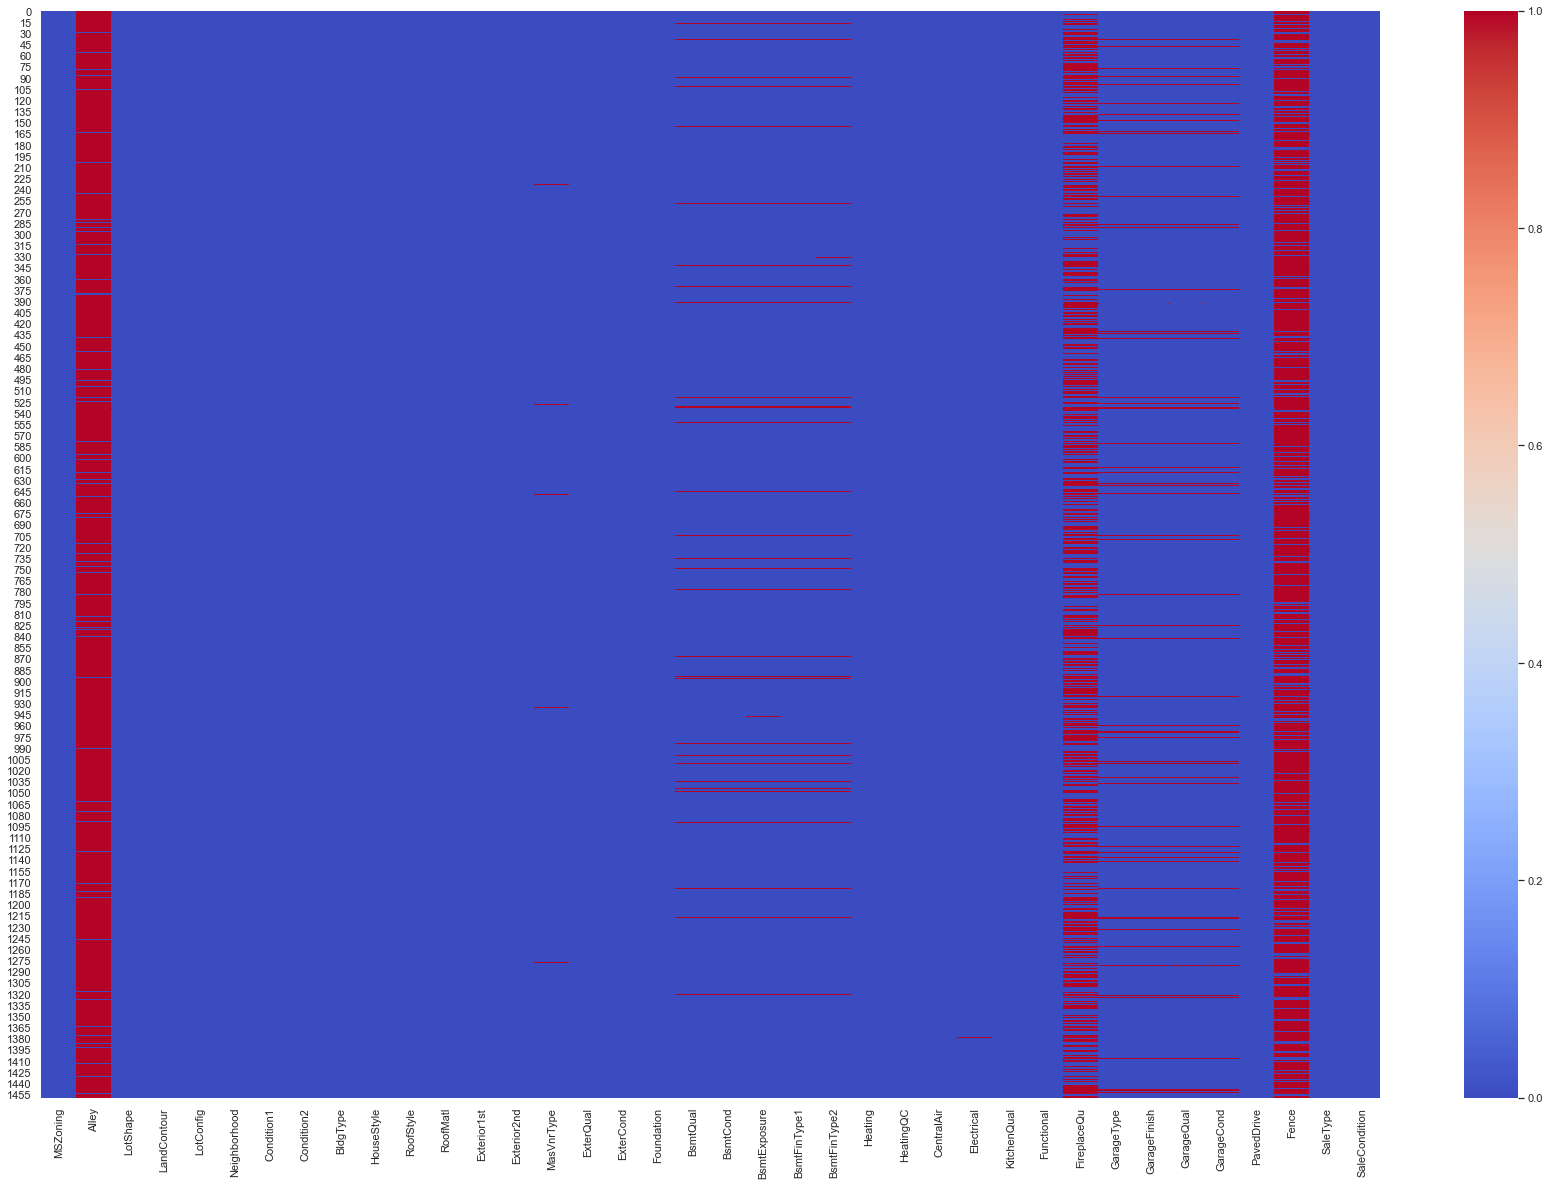

In [114]:
sns.set(rc = {'figure.figsize':(30,20)})
sns.heatmap(house_data[significant_cat_values].isnull(),cmap='coolwarm')

In [116]:
#setting the display option for dataframe
pd.set_option("display.max_rows", 1500)
pd.set_option("display.max_columns", 100)

In [117]:
house_data[house_data[significant_cat_values].notnull()][significant_cat_values]

MSZoning Alley LotShape LandContour LotConfig Neighborhood Condition1  \
0          RL   NaN      Reg         Lvl    Inside      CollgCr       Norm   
1          RL   NaN      Reg         Lvl       FR2      Veenker      Feedr   
2          RL   NaN      IR1         Lvl    Inside      CollgCr       Norm   
3          RL   NaN      IR1         Lvl    Corner      Crawfor       Norm   
4          RL   NaN      IR1         Lvl       FR2      NoRidge       Norm   
5          RL   NaN      IR1         Lvl    Inside      Mitchel       Norm   
6          RL   NaN      Reg         Lvl    Inside      Somerst       Norm   
7          RL   NaN      IR1         Lvl    Corner       NWAmes       PosN   
8          RM   NaN      Reg         Lvl    Inside      OldTown     Artery   
9          RL   NaN      Reg         Lvl    Corner      BrkSide     Artery   
10         RL   NaN      Reg         Lvl    Inside       Sawyer       Norm   
11         RL   NaN      IR1         Lvl    Inside      NridgHt       Norm   
12         RL   NaN      IR2         Lvl    Inside       Sawyer       Norm   
13         RL   NaN      IR1         Lvl    Inside      CollgCr       Norm   
14         RL   NaN      IR1         Lvl    Corner        NAmes       Norm   
15         RM   NaN      Reg         Lvl    Corner      BrkSide       Norm   
16         RL   NaN      IR1         Lvl   CulDSac        NAmes       Norm   
17         RL   NaN      Reg         Lvl    Inside       Sawyer       Norm   
18         RL   NaN      Reg         Lvl    Inside      SawyerW       RRAe   
19         RL   NaN      Reg         Lvl    Inside        NAmes       Norm   
20         RL   NaN      IR1         Lvl    Corner      NridgHt       Norm   
21         RM  Grvl      Reg         Bnk    Inside       IDOTRR       Norm   
22         RL   NaN      Reg         Lvl    Inside      CollgCr       Norm   
23         RM   NaN      Reg         Lvl    Inside      MeadowV       Norm   
24         RL   NaN      IR1         Lvl    Inside       Sawyer       Norm   
25         RL   NaN      Reg         Lvl    Corner      NridgHt       Norm   
26         RL   NaN      Reg         Lvl    Corner        NAmes       Norm   
27         RL   NaN      Reg         Lvl    Inside      NridgHt       Norm   
28         RL   NaN      IR1         Lvl   CulDSac        NAmes       Norm   
29         RM   NaN      IR1         Lvl    Inside      BrkSide      Feedr   
30    C (all)  Pave      Reg         Lvl    Inside       IDOTRR      Feedr   
31         RL   NaN      IR1         Lvl   CulDSac       Sawyer       Norm   
32         RL   NaN      Reg         Lvl    Corner      CollgCr       Norm   
33         RL   NaN      IR1         Lvl    Inside        NAmes       Norm   
34         RL   NaN      Reg         Lvl    Inside      NridgHt       Norm   
35         RL   NaN      Reg         Lvl    Inside      NridgHt       Norm   
36         RL   NaN      Reg         Lvl    Corner      CollgCr       Norm   
37         RL   NaN      Reg         Lvl    Inside        NAmes       Norm   
38         RL   NaN      Reg         Lvl    Inside        NAmes       Norm   
39         RL   NaN      Reg         Lvl    Inside      Edwards       Norm   
40         RL   NaN      Reg         Lvl    Inside        NAmes       Norm   
41         RL   NaN      Reg         Lvl    Inside       Timber       Norm   
42         RL   NaN      IR1         Lvl   CulDSac      SawyerW       Norm   
43         RL   NaN      IR1         Lvl   CulDSac      CollgCr       Norm   
44         RL   NaN      Reg         Lvl    Inside        NAmes       Norm   
45         RL   NaN      Reg         Lvl    Inside      NridgHt       Norm   
46         RL   NaN      IR1         Lvl   CulDSac      Mitchel       Norm   
47         FV   NaN      Reg         Lvl    Inside      Somerst       Norm   
48         RM   NaN      Reg         Lvl    Inside      OldTown       Norm   
49         RL   NaN      Reg         Lvl    Inside       Sawyer       Norm   
50         RL   NaN      IR

###  Handeling the missing values in the categorical fields

In [118]:
clean_cat_house_data = house_data[significant_cat_values].fillna('Missing')

<AxesSubplot:>

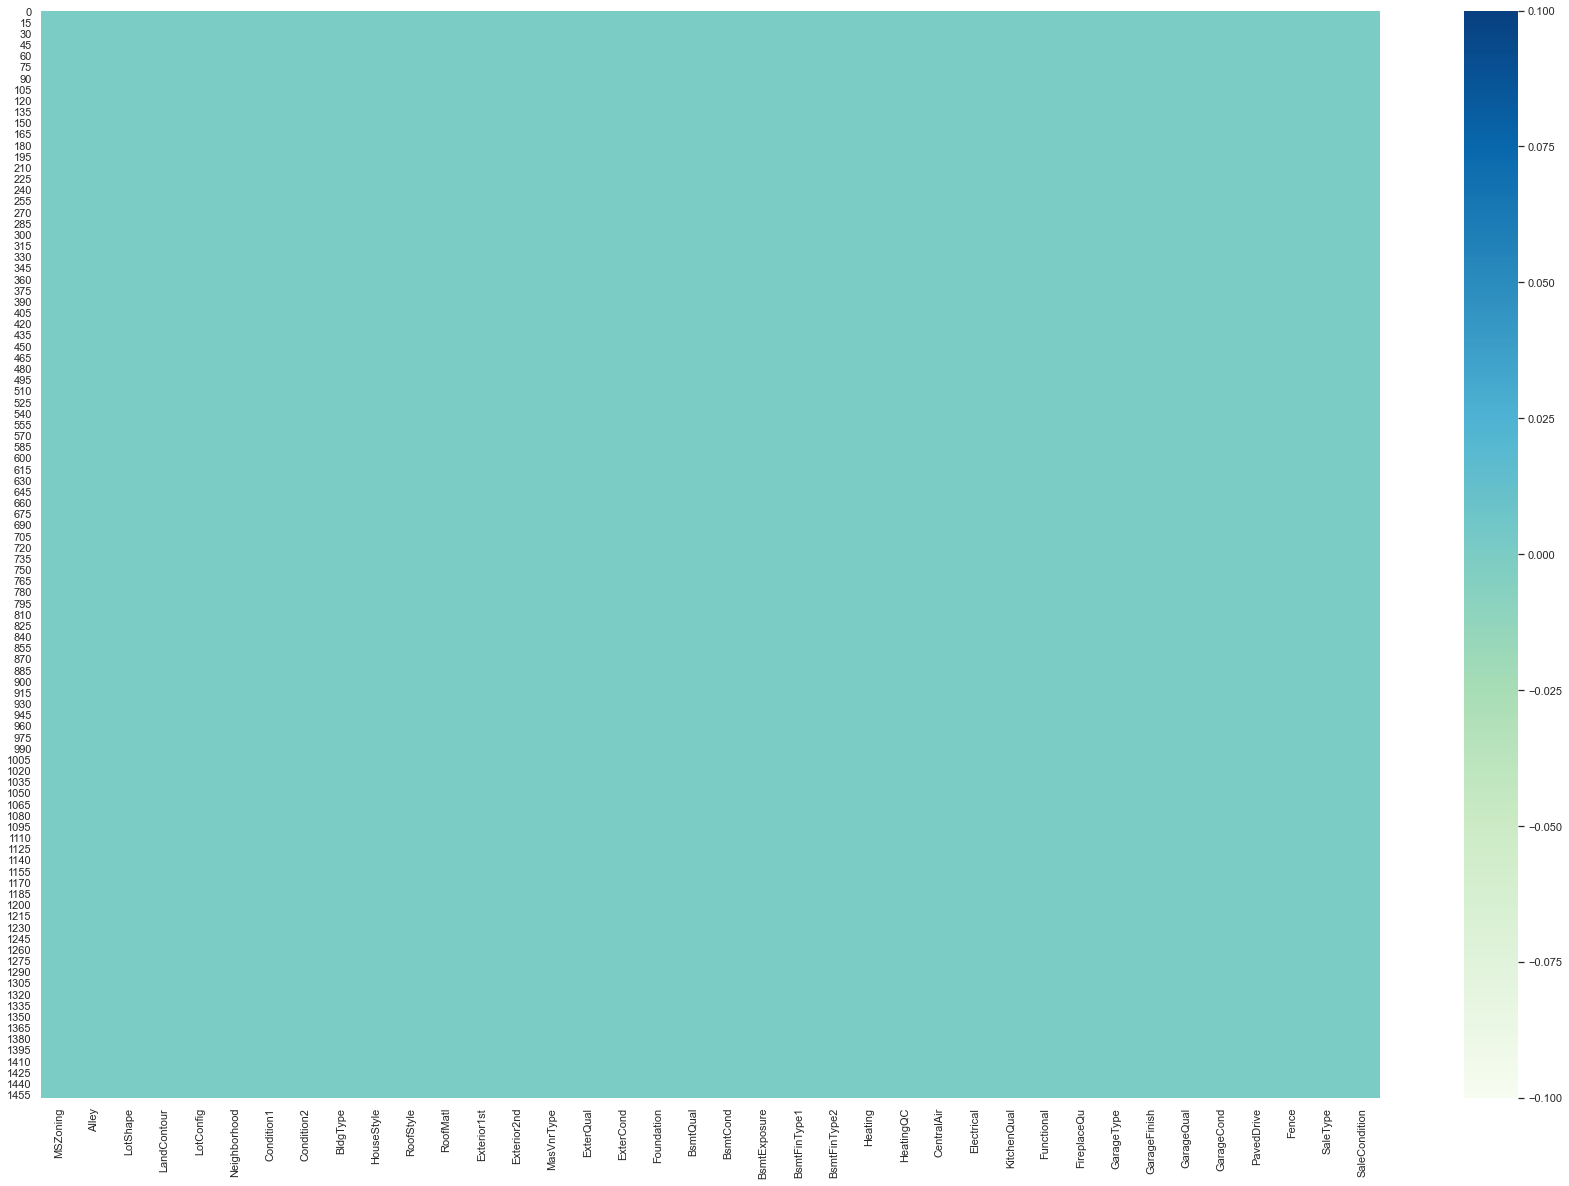

In [119]:
sns.heatmap(clean_cat_house_data.isnull(),cmap='GnBu')

### Handeling the missing values for Numerical features

<AxesSubplot:>

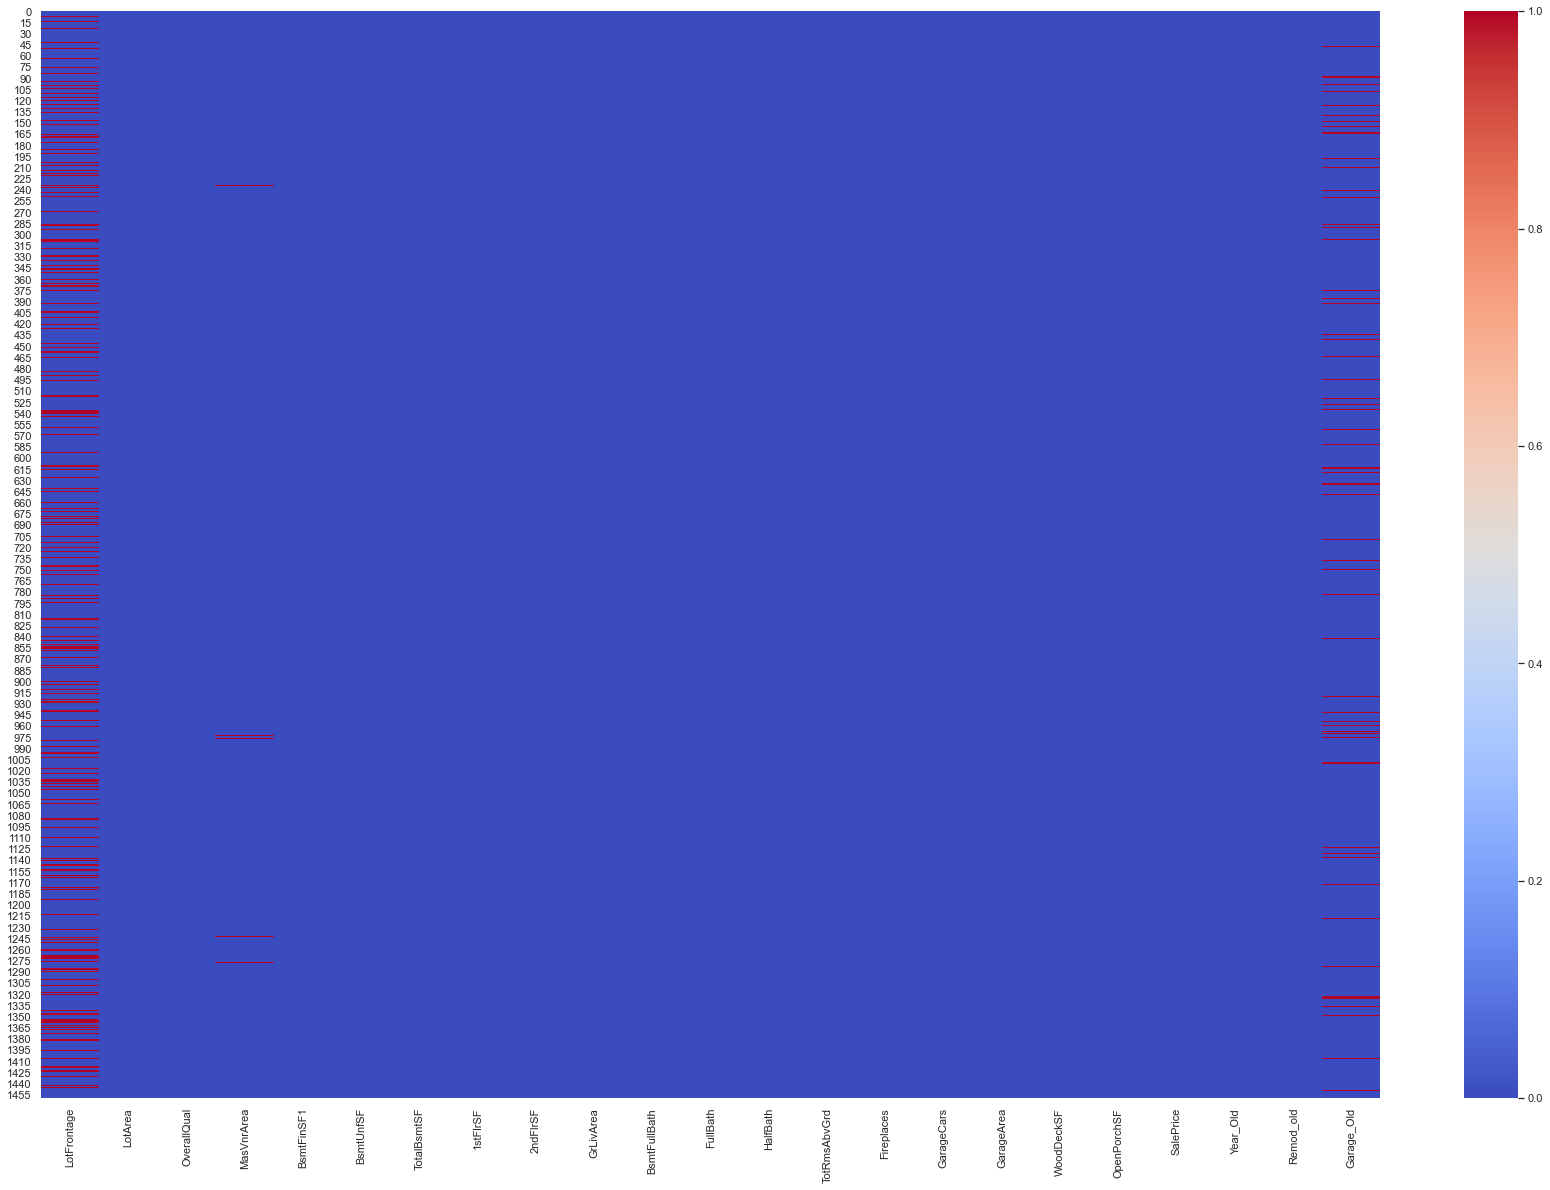

In [120]:
sns.heatmap(house_data[significant_num_col].isnull(),cmap='coolwarm')

In [35]:
house_data[significant_num_col][['LotFrontage','LotArea']]

LotFrontage  LotArea
0            65.0     8450
1            80.0     9600
2            68.0    11250
3            60.0     9550
4            84.0    14260
5            85.0    14115
6            75.0    10084
7             NaN    10382
8            51.0     6120
9            50.0     7420
10           70.0    11200
11           85.0    11924
12            NaN    12968
13           91.0    10652
14            NaN    10920
15           51.0     6120
16            NaN    11241
17           72.0    10791
18           66.0    13695
19           70.0     7560
20          101.0    14215
21           57.0     7449
22           75.0     9742
23           44.0     4224
24            NaN     8246
25          110.0    14230
26           60.0     7200
27           98.0    11478
28           47.0    16321
29           60.0     6324
30           50.0     8500
31            NaN     8544
32           85.0    11049
33           70.0    10552
34           60.0     7313
35          108.0    13418
36          112.0    10859
37           74.0     8532
38           68.0     7922
39           65.0     6040
40           84.0     8658
41          115.0    16905
42            NaN     9180
43            NaN     9200
44           70.0     7945
45           61.0     7658
46           48.0    12822
47           84.0    11096
48           33.0     4456
49           66.0     7742
50            NaN    13869
51           52.0     6240
52          110.0     8472
53           68.0    50271
54           60.0     7134
55          100.0    10175
56           24.0     2645
57           89.0    11645
58           66.0    13682
59           60.0     7200
60           63.0    13072
61           60.0     7200
62           44.0     6442
63           50.0    10300
64            NaN     9375
65           76.0     9591
66            NaN    19900
67           72.0    10665
68           47.0     4608
69           81.0    15593
70           95.0    13651
71           69.0     7599
72           74.0    10141
73           85.0    10200
74           60.0     5790
75           21.0     1596
76            NaN     8475
77           50.0     8635
78           72.0    10778
79           60.0    10440
80          100.0    13000
81           32.0     4500
82           78.0    10206
83           80.0     8892
84            NaN     8530
85          121.0    16059
86          122.0    11911
87           40.0     3951
88          105.0     8470
89           60.0     8070
90           60.0     7200
91           85.0     8500
92           80.0    13360
93           60.0     7200
94           69.0     9337
95            NaN     9765
96           78.0    10264
97           73.0    10921
98           85.0    10625
99           77.0     9320
100           NaN    10603
101          77.0     9206
102          64.0     7018
103          94.0    10402
104           NaN     7758
105          75.0     9375
106          60.0    10800
107          50.0     6000
108          85.0     8500
109         105.0    11751
110          75.0     9525
111           NaN     7750
112          77.0     9965
113           NaN    21000
114          61.0     7259
115          34.0     3230
116           NaN    11616
117          74.0     8536
118          90.0    12376
119          65.0     8461
120           NaN    21453
121          50.0     6060
122          75.0     9464
123          55.0     7892
124          48.0    17043
125          60.0     6780
126           NaN     4928
127          55.0     4388
128          69.0     7590
129          69.0     8973
130          88.0    14200
131           NaN    12224
132          75.0     7388
133           NaN     6853
134          78.0    10335
135          80.0    10400
136           NaN    10355
137          82.0    11070
138          73.0     9066
139          65.0    15426
140          70.0    10500
141          78.0    11645
142          71.0     8520
143          78.0    10335
144          70.0     9100
145          24.0     2522
146          51.0     6120
147       

## Predicting the missing value with another field

In [36]:
np.log(house_data[significant_num_col][['LotFrontage','LotArea']])

LotFrontage    LotArea
0        4.174387   9.041922
1        4.382027   9.169518
2        4.219508   9.328123
3        4.094345   9.164296
4        4.430817   9.565214
5        4.442651   9.554993
6        4.317488   9.218705
7             NaN   9.247829
8        3.931826   8.719317
9        3.912023   8.911934
10       4.248495   9.323669
11       4.442651   9.386308
12            NaN   9.470240
13       4.510860   9.273503
14            NaN   9.298351
15       3.931826   8.719317
16            NaN   9.327323
17       4.276666   9.286468
18       4.189655   9.524786
19       4.248495   8.930626
20       4.615121   9.562053
21       4.043051   8.915835
22       4.317488   9.184202
23       3.784190   8.348538
24            NaN   9.017484
25       4.700480   9.563108
26       4.094345   8.881836
27       4.584967   9.348187
28       3.850148   9.700208
29       4.094345   8.752107
30       3.912023   9.047821
31            NaN   9.052985
32       4.442651   9.310095
33       4.248495   9.264071
34       4.094345   8.897409
35       4.682131   9.504352
36       4.718499   9.292750
37       4.304065   9.051579
38       4.219508   8.977399
39       4.174387   8.706159
40       4.430817   9.066239
41       4.744932   9.735365
42            NaN   9.124782
43            NaN   9.126959
44       4.248495   8.980298
45       4.110874   8.943506
46       3.871201   9.458918
47       4.430817   9.314340
48       3.496508   8.402007
49       4.189655   8.954415
50            NaN   9.537411
51       3.951244   8.738735
52       4.700480   9.044522
53       4.219508  10.825184
54       4.094345   8.872627
55       4.605170   9.227689
56       3.178054   7.880426
57       4.488636   9.362632
58       4.189655   9.523836
59       4.094345   8.881836
60       4.143135   9.478228
61       4.094345   8.881836
62       3.784190   8.770594
63       3.912023   9.239899
64            NaN   9.145802
65       4.330733   9.168580
66            NaN   9.898475
67       4.276666   9.274723
68       3.850148   8.435549
69       4.394449   9.654577
70       4.553877   9.521568
71       4.234107   8.935772
72       4.304065   9.224342
73       4.442651   9.230143
74       4.094345   8.663888
75       3.044522   7.375256
76            NaN   9.044876
77       3.912023   9.063579
78       4.276666   9.285262
79       4.094345   9.253400
80       4.605170   9.472705
81       3.465736   8.411833
82       4.356709   9.230731
83       4.382027   9.092907
84            NaN   9.051345
85       4.795791   9.684025
86       4.804021   9.385218
87       3.688879   8.281724
88       4.653960   9.044286
89       4.094345   8.995909
90       4.094345   8.881836
91       4.442651   9.047821
92       4.382027   9.500020
93       4.094345   8.881836
94       4.234107   9.141740
95            NaN   9.186560
96       4.356709   9.236398
97       4.290459   9.298443
98       4.442651   9.270965
99       4.343805   9.139918
100           NaN   9.268892
101      4.343805   9.127611
102      4.158883   8.856234
103      4.543295   9.249753
104           NaN   8.956480
105      4.317488   9.145802
106      4.094345   9.287301
107      3.912023   8.699515
108      4.442651   9.047821
109      4.653960   9.371694
110      4.317488   9.161675
111           NaN   8.955448
112      4.343805   9.206834
113           NaN   9.952278
114      4.110874   8.889997
115      3.526361   8.080237
116           NaN   9.360139
117      4.304065   9.052048
118      4.499810   9.423514
119      4.174387   9.043223
120           NaN   9.973620
121      3.912023   8.709465
122      4.317488   9.155250
123      4.007333   8.973605
124      3.871201   9.743495
125      4.094345   8.821732
126           NaN   8.502689
127      4.007333   8.386629
128      4.234107   8.934587
129      4.234107   9.101975
130      4.477337   9.560997
131           NaN   9.411157
132      4.317488   8.907612
133           NaN   8.832442
134      4.356709   9.243291
135      4.382027   9.249561
136           NaN   9.245225
137 

<AxesSubplot:xlabel='LotArea', ylabel='LotFrontage'>

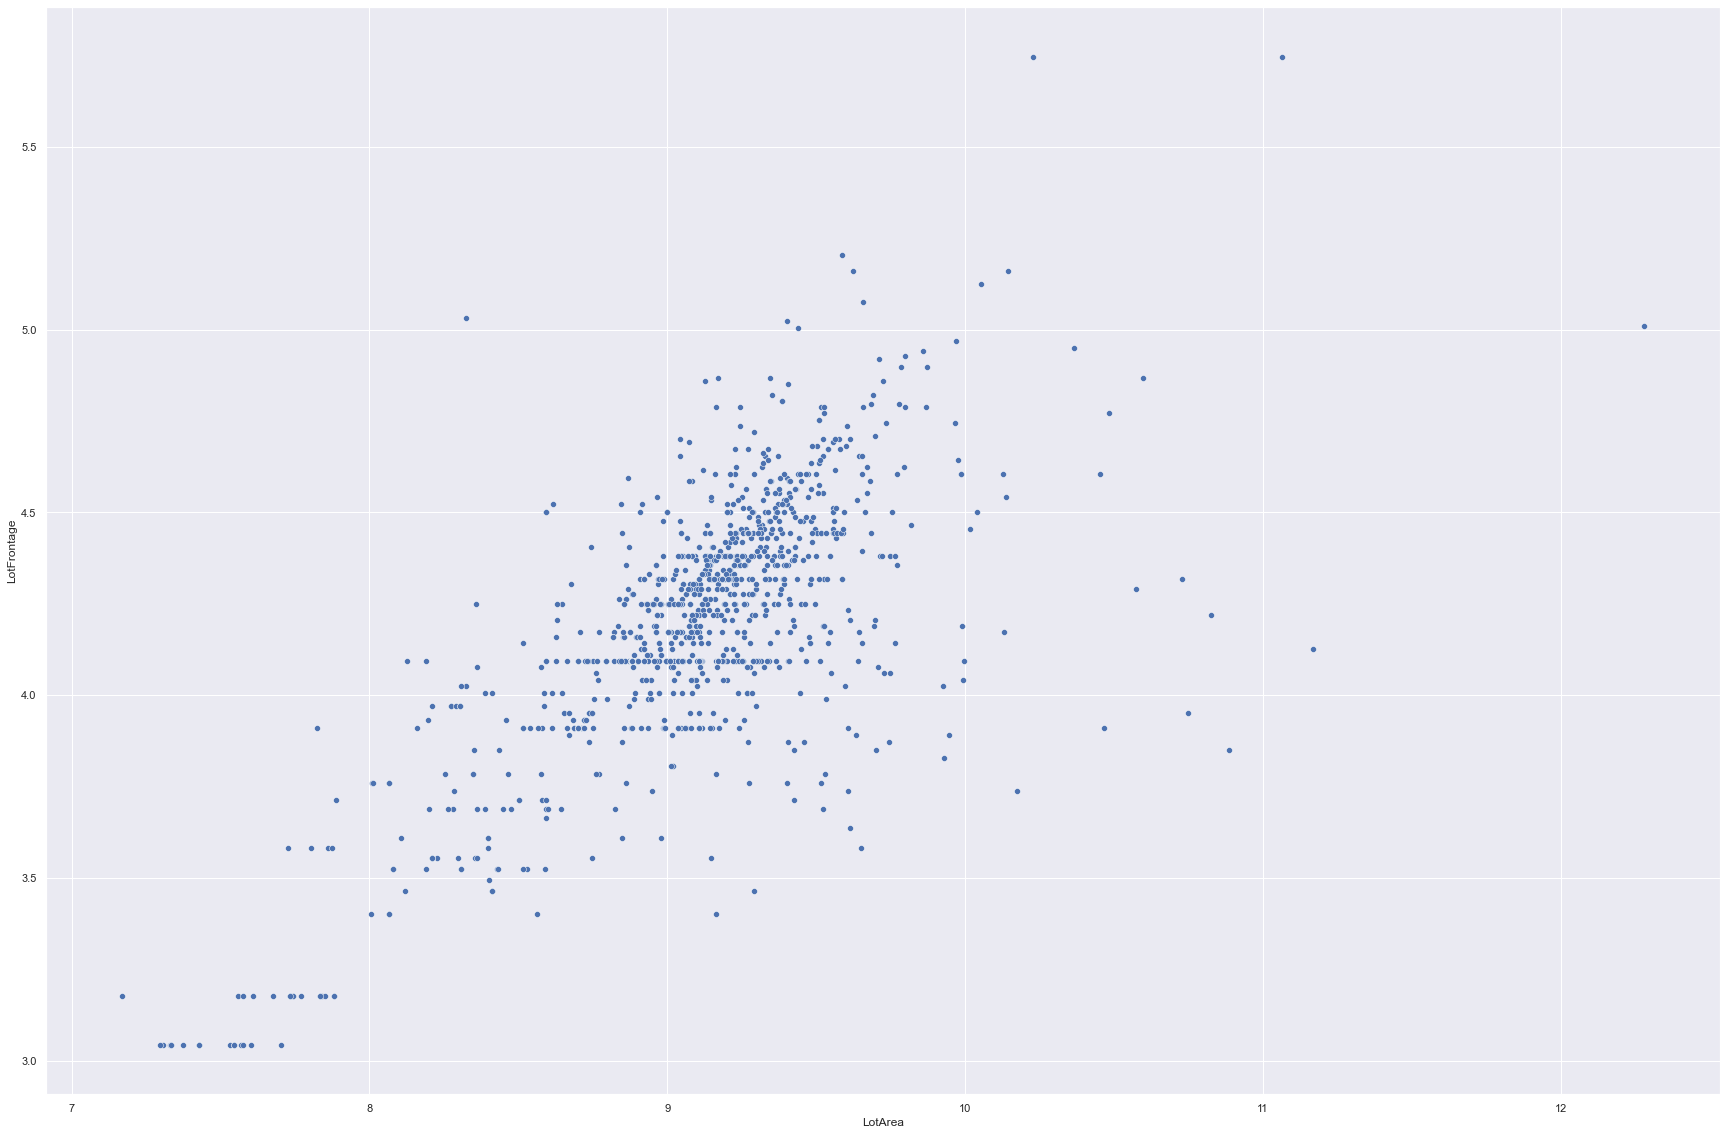

In [121]:
#Identifying the relation between the two fields
sns.scatterplot(x ='LotArea',y='LotFrontage',data= np.log(house_data[significant_num_col][['LotFrontage','LotArea']]))

In [122]:
np.log(house_data[significant_num_col][['LotFrontage','LotArea']]).corr()

LotFrontage  LotArea
LotFrontage      1.00000  0.74555
LotArea          0.74555  1.00000

In [123]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


### Predicting the missing value of  LotArea through  LotFrontage

In [126]:
lm = LinearRegression()

In [128]:
X = np.log(house_data[significant_num_col]['LotFrontage'])

In [129]:
y = np.log(house_data[significant_num_col]['LotArea'])

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [131]:
X_train[X_train.notnull()]

135     4.382027
1452    3.555348
762     4.276666
932     4.430817
435     3.761200
629     4.406719
1210    4.248495
1118    4.442651
158     4.605170
1259    4.174387
551     3.912023
497     4.094345
1031    4.624973
1013    4.094345
1311    4.219508
566     4.343805
1278    4.317488
1263    4.094345
438     3.688879
940     4.007333
96      4.356709
1182    5.075174
471     4.521789
1004    3.761200
410     4.219508
963     4.804021
582     4.394449
156     4.094345
594     4.477337
617     4.077537
1205    4.499810
861     4.317488
1010    4.744932
390     3.912023
1409    3.828641
847     3.583519
1284    3.912023
615     4.382027
613     4.248495
1303    4.290459
486     4.369448
561     4.343805
461     4.094345
1142    4.343805
730     3.663562
1155    4.499810
1203    4.317488
700     4.442651
849     4.382027
787     4.330733
352     4.094345
710     4.025352
124     3.871201
178     4.143135
1208    4.248495
294     4.382027
327     4.382027
1456    4.442651
841     4.0943

In [132]:
y_train = y_train[X_train.notnull()].values.reshape(-1,1)
X_train = X_train[X_train.notnull()].values.reshape(-1,1)
X_test = X_test[X_test.notnull()].values.reshape(-1,1)

In [133]:
X_train

array([[4.38202663],
       [3.55534806],
       [4.27666612],
       [4.4308168 ],
       [3.76120012],
       [4.40671925],
       [4.24849524],
       [4.44265126],
       [4.60517019],
       [4.17438727],
       [3.91202301],
       [4.09434456],
       [4.62497281],
       [4.09434456],
       [4.21950771],
       [4.34380542],
       [4.31748811],
       [4.09434456],
       [3.68887945],
       [4.00733319],
       [4.35670883],
       [5.07517382],
       [4.52178858],
       [3.76120012],
       [4.21950771],
       [4.80402104],
       [4.39444915],
       [4.09434456],
       [4.47733681],
       [4.07753744],
       [4.49980967],
       [4.31748811],
       [4.74493213],
       [3.91202301],
       [3.8286414 ],
       [3.58351894],
       [3.91202301],
       [4.38202663],
       [4.24849524],
       [4.29045944],
       [4.36944785],
       [4.34380542],
       [4.09434456],
       [4.34380542],
       [3.66356165],
       [4.49980967],
       [4.31748811],
       [4.442

In [134]:
lm.fit(X_train,y_train)

LinearRegression()

In [135]:
y_pred = lm.predict(X_test)

In [136]:
y_pred

array([[ 9.14062305],
       [ 9.4916179 ],
       [ 8.9078483 ],
       [ 8.78962819],
       [ 9.39112901],
       [ 7.88468506],
       [ 8.02397986],
       [ 7.88468506],
       [ 8.96228647],
       [ 8.83054172],
       [ 9.01402408],
       [ 9.7028834 ],
       [ 9.14062305],
       [ 9.07924291],
       [ 9.01402408],
       [ 9.14062305],
       [ 8.96228647],
       [ 9.17000982],
       [ 9.37934175],
       [ 9.21259375],
       [ 9.0471431 ],
       [ 9.19859137],
       [ 9.11038437],
       [ 8.88905209],
       [ 9.18439848],
       [ 9.86368745],
       [ 9.51269259],
       [ 8.72508215],
       [ 9.42571211],
       [ 9.34315911],
       [ 9.84867767],
       [ 9.66751861],
       [ 9.27991784],
       [ 8.979819  ],
       [ 9.06331647],
       [ 9.14062305],
       [ 8.83054172],
       [ 8.99706173],
       [ 9.4916179 ],
       [ 9.40278456],
       [ 9.07924291],
       [ 9.07924291],
       [ 9.48091872],
       [ 9.25350728],
       [ 8.979819  ],
       [ 9

In [137]:
y_test

892      9.037652
1105     9.413771
413      9.100526
522      8.517193
1036     9.464828
614      7.307202
218      9.658865
1160     7.731931
649      7.568379
887      9.709053
576      8.747034
1252     9.196039
1061     9.798127
567      9.227296
1108     8.995041
1113     9.096387
168      9.017241
1102     8.853665
1120     9.019543
67       9.274723
1040     9.482274
453      9.104980
670      9.063347
1094     8.677269
192      9.106867
123      8.973605
415      9.093694
277      9.859431
433      9.290906
1317     8.349957
184      8.914357
554      9.270965
1173     9.799792
76       9.044876
906      9.510519
674      9.126959
1398     8.881836
374      9.011889
1032     9.584728
259      9.449515
51       8.738735
244      9.091557
1101     9.185843
581      9.449672
679      9.204825
1132     9.200290
1220     8.961879
49       8.954415
591      9.508814
1269     9.336444
1249     8.881836
1138     9.192075
490      7.887959
1024     9.648466
811      8.397959
141      9

## Identification of multicollinearity

In [138]:
np.log(house_data[significant_num_col]).corr()

<ipython-input-138-b606f71724c6>:1: RuntimeWarning: divide by zero encountered in log
  np.log(house_data[significant_num_col]).corr()
<ipython-input-138-b606f71724c6>:1: RuntimeWarning: invalid value encountered in log
  np.log(house_data[significant_num_col]).corr()


LotFrontage   LotArea  OverallQual  MasVnrArea  BsmtFinSF1  \
LotFrontage      1.000000  0.745550     0.205069    0.169823    0.148184   
LotArea          0.745550  1.000000     0.162925    0.181308    0.211437   
OverallQual      0.205069  0.162925     1.000000    0.255136    0.139440   
MasVnrArea       0.169823  0.181308     0.255136    1.000000    0.203413   
BsmtFinSF1       0.148184  0.211437     0.139440    0.203413    1.000000   
BsmtUnfSF        0.123711  0.040676     0.165051   -0.006170   -0.422047   
TotalBsmtSF      0.381237  0.382818     0.454878    0.177927    0.244418   
1stFlrSF         0.459595  0.467465     0.431252    0.143231    0.224503   
2ndFlrSF         0.370701  0.294270     0.521797    0.241681    0.159100   
GrLivArea        0.350747  0.385435     0.601148    0.358130    0.144678   
BsmtFullBath     0.044192  0.204745    -0.034592    0.079213    0.183069   
FullBath         0.171953  0.182368     0.539825    0.112728    0.054475   
HalfBath         0.027280  0.022112    -0.128999   -0.145465    0.023456   
TotRmsAbvGrd     0.367678  0.369322     0.426613    0.242844    0.067840   
Fireplaces       0.123099  0.264213    -0.006088    0.086676    0.141556   
GarageCars       0.265909  0.230783     0.537771    0.227059    0.159634   
GarageArea       0.326671  0.291825     0.487103    0.295529    0.222183   
WoodDeckSF       0.167941  0.248346     0.103500    0.323216    0.157093   
OpenPorchSF      0.130882  0.166580     0.070945    0.240574    0.098275   
SalePrice        0.364108  0.399918     0.794007    0.316969    0.261217   
Year_Old        -0.056922  0.020285    -0.591112   -0.010000   -0.010995   
Remod_old       -0.029610  0.012580    -0.458837    0.058128    0.030888   
Garage_Old      -0.010189  0.068498    -0.555560    0.030177    0.041630   

              BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  \
LotFrontage    0.123711     0.381237  0.459595  0.370701   0.350747   
LotArea        0.040676     0.382818  0.467465  0.294270   0.385435   
OverallQual    0.165051     0.454878  0.431252  0.521797   0.601148   
MasVnrArea    -0.006170     0.177927  0.143231  0.241681   0.358130   
BsmtFinSF1    -0.422047     0.244418  0.224503  0.159100   0.144678   
BsmtUnfSF      1.000000     0.274988  0.240557  0.092853   0.207520   
TotalBsmtSF    0.274988     1.000000  0.841629  0.413535   0.422955   
1stFlrSF       0.240557     0.841629  1.000000  0.385801   0.545984   
2ndFlrSF       0.092853     0.413535  0.385801  1.000000   0.773775   
GrLivArea      0.207520     0.422955  0.545984  0.773775   1.000000   
BsmtFullBath  -0.224758     0.145879  0.118439 -0.266375   0.061415   
FullBath       0.219955     0.356495  0.376655  0.559935   0.653745   
HalfBath       0.027705     0.025973  0.034815  0.070141   0.025496   
TotRmsAbvGrd   0.232250     0.297955  0.414699  0.613863   0.827690   
Fireplaces    -0.100011     0.147294  0.187740  0.065163   0.153711   
GarageCars     0.127928     0.420638  0.423216  0.532517   0.485862   
GarageArea     0.097808     0.471039  0.476589  0.500900   0.459978   
WoodDeckSF    -0.084373     0.196876  0.257856  0.146919   0.205540   
OpenPorchSF   -0.000779     0.122974  0.083005  0.092122   0.191699   
SalePrice      0.086320     0.604831  0.608947  0.646814   0.730255   
Year_Old      -0.161805    -0.366500 -0.255987 -0.337553  -0.275917   
Remod_old     -0.100035    -0.183280 -0.165071 -0.232885  -0.223259   
Garage_Old    -0.186709    -0.280843 -0.185483 -0.296406  -0.244428   

              BsmtFullBath  FullBath  HalfBath  TotRmsAbvGrd  Fireplaces  \
LotFrontage       0.044192  0.171953  0.027280      0.367678    0.123099   
LotArea           0.204745  0.182368  0.022112      0.369322    0.264213   
OverallQual      -0.034592  0.539825 -0.128999      0.426613   -0.006088   
MasVnrArea        0.079213  0.112728 -0.145465      0.242844    0.086676   
BsmtFinSF1        0.183069  0.054475  0.023456      0.067840    0.141556   
BsmtUnfSF        -0.224758  

In [139]:
#Select independent columns where no or less corelation is present

final_significant_num_col = [
 'LotArea',
 'OverallQual',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'HalfBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
  'Year_Old']

<AxesSubplot:>

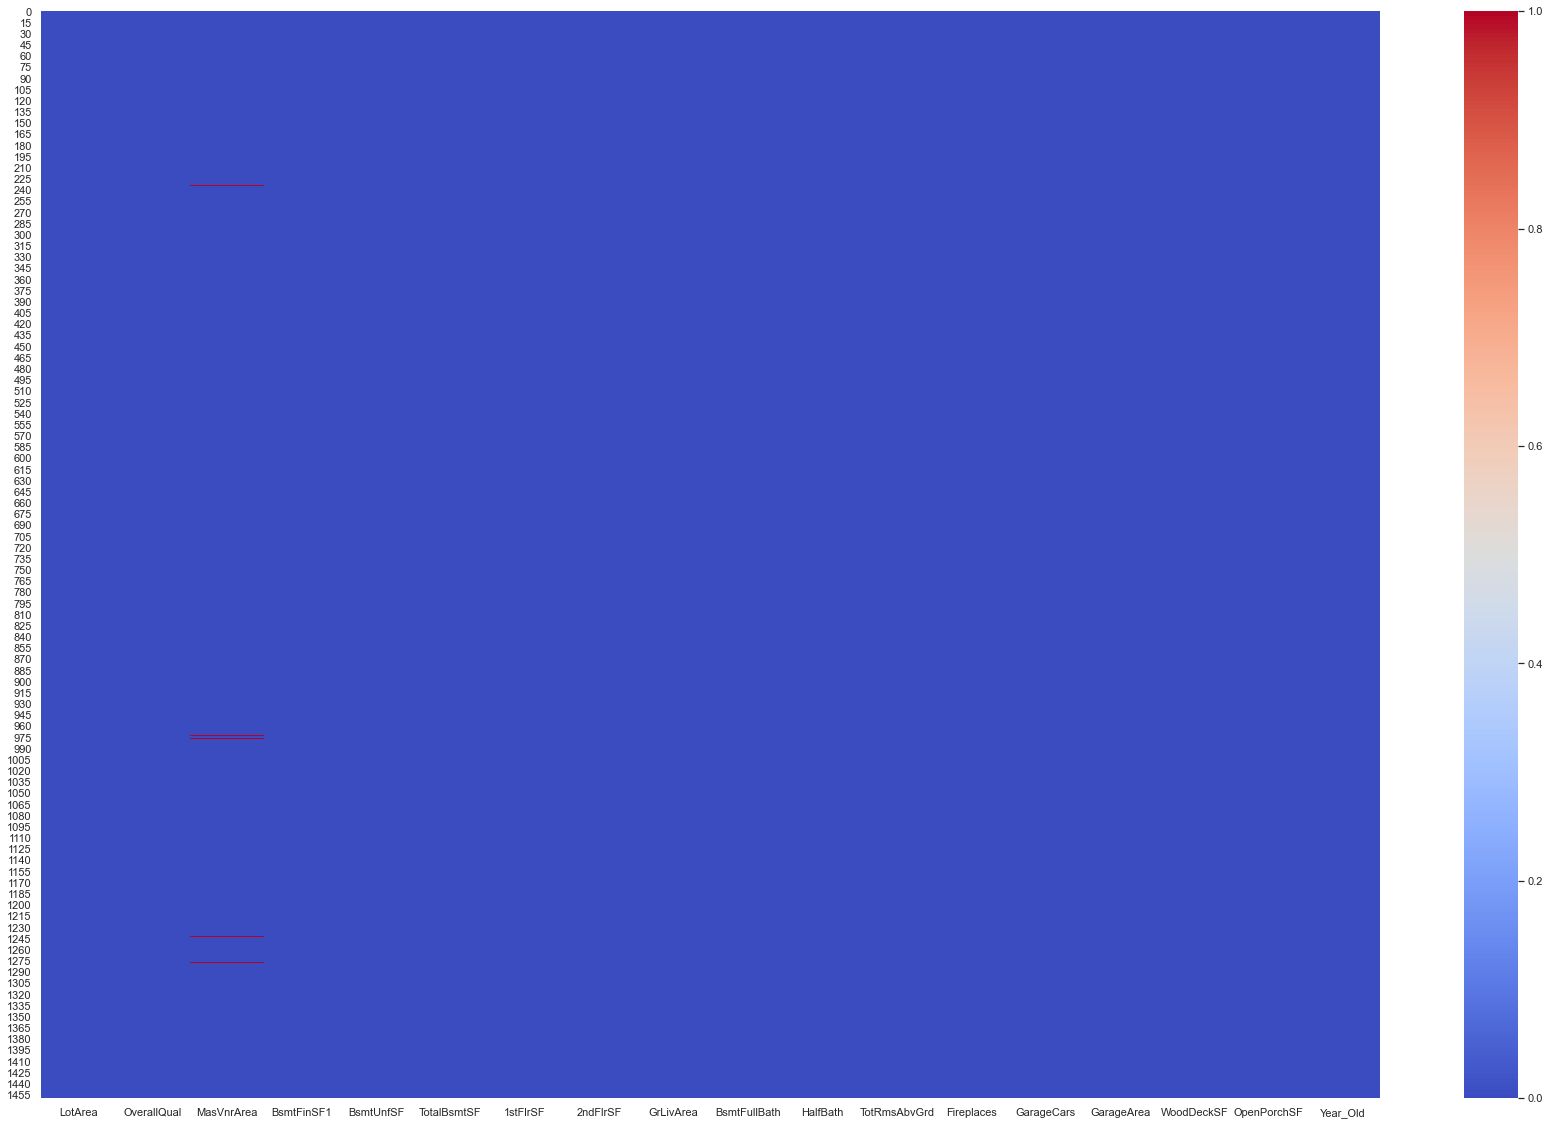

In [140]:
sns.heatmap(house_data[final_significant_num_col].isnull(),cmap='coolwarm')

## Handeling missing values in numerical features

In [142]:
house_data[house_data['MasVnrArea'].isnull()]['MasVnrArea']

234    NaN
529    NaN
650    NaN
936    NaN
973    NaN
977    NaN
1243   NaN
1278   NaN
Name: MasVnrArea, dtype: float64

In [143]:
clean_num_house_data = house_data[final_significant_num_col].fillna(0)

In [144]:
clean_num_house_data

LotArea  OverallQual  MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
0        8450            7       196.0         706        150          856   
1        9600            6         0.0         978        284         1262   
2       11250            7       162.0         486        434          920   
3        9550            7         0.0         216        540          756   
4       14260            8       350.0         655        490         1145   
5       14115            5         0.0         732         64          796   
6       10084            8       186.0        1369        317         1686   
7       10382            7       240.0         859        216         1107   
8        6120            7         0.0           0        952          952   
9        7420            5         0.0         851        140          991   
10      11200            5         0.0         906        134         1040   
11      11924            9       286.0         998        177         1175   
12      12968            5         0.0         737        175          912   
13      10652            7       306.0           0       1494         1494   
14      10920            6       212.0         733        520         1253   
15       6120            7         0.0           0        832          832   
16      11241            6       180.0         578        426         1004   
17      10791            4         0.0           0          0            0   
18      13695            5         0.0         646        468         1114   
19       7560            5         0.0         504        525         1029   
20      14215            8       380.0           0       1158         1158   
21       7449            7         0.0           0        637          637   
22       9742            8       281.0           0       1777         1777   
23       4224            5         0.0         840        200         1040   
24       8246            5         0.0         188        204         1060   
25      14230            8       640.0           0       1566         1566   
26       7200            5         0.0         234        180          900   
27      11478            8       200.0        1218        486         1704   
28      16321            5         0.0        1277        207         1484   
29       6324            4         0.0           0        520          520   
30       8500            4         0.0           0        649          649   
31       8544            5         0.0           0       1228         1228   
32      11049            8         0.0           0       1234         1234   
33      10552            5         0.0        1018        380         1398   
34       7313            9       246.0        1153        408         1561   
35      13418            8       132.0           0       1117         1117   
36      10859            5         0.0           0       1097         1097   
37       8532            5       650.0        1213         84         1297   
38       7922            5         0.0         731        326         1057   
39       6040            4         0.0           0          0            0   
40       8658            6       101.0         643        445         1088   
41      16905            5         0.0         967        383         1350   
42       9180            5         0.0         747          0          840   
43       9200            5         0.0         280        167          938   
44       7945            5         0.0         179        465         1150   
45       7658            9       412.0         456       1296         1752   
46      12822            7         0.0        1351         83         1434   
47      11096            8         0.0          24       1632         1656   
48       4456            4         0.0           0        736          736   
49       7742            5         0.0         763        192          955   
50      13869            6  

In [146]:
#Created a function to convert categorical fields in Numerical values 
def cat_converter(df):
    for i in df.columns:
        df[i] = clean_cat_house_data[i].astype('category').cat.codes
    
    return df
    

In [147]:
#Convert categorical fields in numerical field 
clean_cat_house_data = cat_converter(clean_cat_house_data)

In [148]:
#Created final dataframe with required features 
final_house_data = pd.concat((clean_cat_house_data,clean_num_house_data),axis = 1)

In [150]:
X = final_house_data
y = house_data['SalePrice']

## Spliting the train and test data 

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##  Standerdizing the dataset

In [153]:
from sklearn.preprocessing import StandardScaler

In [154]:
scaler = StandardScaler()

In [155]:
X_train = scaler.fit_transform(X_train)

## Model Selection and Evaluation

In [156]:
from sklearn.linear_model import LinearRegression

In [157]:
lm = LinearRegression()

In [158]:
rslt = lm.fit(X_train,y_train)

In [159]:
X_test = scaler.transform(X_test)

In [160]:
y_pred = lm.predict(X_test)

In [161]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [162]:
MAE = mean_absolute_error(y_test,y_pred)

In [163]:
MSE = mean_squared_error(y_test,y_pred)

In [164]:
RMSE = MSE**(1/2)

In [165]:
R2 = r2_score(y_test,y_pred)

In [166]:
print ('Mean absolute error : {} \n Mean square error: {} \n  Root Mean square error: {} \n r2Score :{}'.format(MAE,MSE,RMSE,R2))

Mean absolute error : 22136.809732856655 
 Mean square error: 1144679722.0074513 
  Root Mean square error: 33833.11575967326 
 r2Score :0.8507651837629954


In [167]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [170]:
support_vec = SVR(kernel = 'rbf')

In [176]:
y_train_support_vec = y_train.values.reshape(-1,1)

In [177]:
y_train_support_vec

array([[145000],
       [178000],
       [ 85000],
       ...,
       [115000],
       [189950],
       [174000]], dtype=int64)

In [178]:
sc_y = StandardScaler()
y_vec = sc_y.fit_transform(y_train_support_vec)

In [179]:
y_vec

array([[-0.47185427],
       [-0.04456195],
       [-1.24874939],
       ...,
       [-0.86030183],
       [ 0.11016966],
       [-0.09635496]])

In [180]:
rslt_support_vec = support_vec.fit(X_train,y_vec)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [181]:
y_pred_support_vec = rslt_support_vec.predict(X_test)

In [182]:
R2_support_vec = r2_score(y_test,sc_y.inverse_transform(y_pred_support_vec))

In [183]:
print(R2_support_vec)

0.7499185593742729


In [184]:
DT = DecisionTreeRegressor()

In [185]:
rslt_DT = DT.fit(X_train,y_train)

In [186]:
X_test

array([[-0.05479609,  0.04767424,  0.76553496, ...,  0.74097645,
        -0.71435182,  0.20030197],
       [-0.05479609,  0.04767424, -1.35664424, ...,  0.69469102,
        -0.2532823 , -0.67946447],
       [ 1.58627662, -3.92971909,  0.76553496, ..., -0.74015748,
        -0.71435182,  1.50365966],
       ...,
       [-0.05479609,  0.04767424,  0.76553496, ..., -0.46244486,
        -0.45500022, -1.10305572],
       [-0.05479609,  0.04767424,  0.76553496, ...,  0.18555123,
        -0.71435182,  1.04748447],
       [-0.05479609,  0.04767424,  0.76553496, ..., -0.74015748,
        -0.71435182,  0.0699662 ]])

In [187]:
y_pred_DT = rslt_DT.predict(X_test)
R2_DT = r2_score(y_test,y_pred_DT)
print(R2_DT)

0.8129909298022024


In [188]:
RF = RandomForestRegressor(n_estimators=200)

In [189]:
rslt_RF = RF.fit(X_train,y_train)

In [190]:
y_pred_RF = rslt_RF.predict(X_test)
R2_RF = r2_score(y_test,y_pred_RF)
print(R2_RF)

0.895576762282029


In [191]:
MAE_RF = mean_absolute_error(y_test,y_pred_RF)
MSE_RF = mean_squared_error(y_test,y_pred_RF)
RMSE_RF = MSE_RF**(1/2)
print ('Mean absolute error : {} \n Mean square error: {} \n  Root Mean square error: {} \n r2Score :{}'.format(MAE_RF,MSE_RF,RMSE_RF,R2_RF))

Mean absolute error : 17642.093493150685 
 Mean square error: 800960296.9074847 
  Root Mean square error: 28301.241967579524 
 r2Score :0.895576762282029


In [194]:
from xgboost import XGBRFRegressor

In [195]:
XGModel = XGBRFRegressor()

In [196]:
rslt_xgb = XGModel.fit(X_train,y_train)

In [197]:
y_pred_xg = rslt_xgb.predict(X_test)

In [198]:
MAE_XG = mean_absolute_error(y_test,y_pred_xg)
MSE_XG = mean_squared_error(y_test,y_pred_xg)
RMSE_XG = MSE_XG**(1/2)
R2_XG = r2_score(y_test,y_pred_xg)
print ('Mean absolute error : {} \n Mean square error: {} \n  Root Mean square error: {} \n r2Score :{}'.format(MAE_XG,MSE_XG,RMSE_XG,R2_XG))

Mean absolute error : 19658.192422945205 
 Mean square error: 854514888.8879281 
  Root Mean square error: 29232.086632464816 
 r2Score :0.8885947134703027


## Exported the model which have highest accuracy

In [199]:
import pickle as pkl
filename = 'finalized_housing_model.sav'
pickle.dump(rslt_RF, open(filename, 'wb'))

<IPython.core.display.Javascript object>